In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import PowerTransformer

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # import


import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('temperature.csv')

In [4]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [5]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [6]:
df.shape

(7752, 25)

There are 25 columns and 7752 rows in the dataset.

In [7]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Observation:

There are 25 columns and 7752  rows in the dataset.

While 1 features use object datatypes, others use float datatypes.

we can also notice the presence of null-values in the dataset.

In [9]:
#Dataset is large, let's look for any entries that are repeated or duplicated in it.
df.duplicated().sum()

0

Hence there is no duplicate value present in dataset.

In [10]:
#Cheking the missing values and visualizing with heatmap

df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

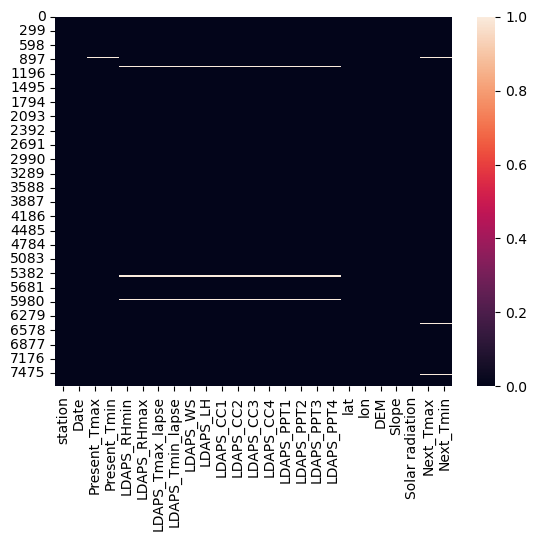

In [11]:
sns.heatmap(df.isnull())

Observation :

20 out 25 columns contains missing value.

As small amount of data is missing almost less than 1% so we can directly  drop these missing values.

In [12]:
#Now Checking the value of each column

for column_name in df.columns:
    value_counts = df[column_name].value_counts()
    print(f"Value counts for {column_name}:\n{value_counts}\n")

Value counts for station:
1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64

Value counts for Date:
30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64

Value counts for Present_Tmax:
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64

Value counts for Present_Tmin:
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Len

There is no whitespace , 'NA' or '-'  are present in the dataset.

In [14]:
# Print the original shape of the DataFrame (rows and columns)
print("We had {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))

# Drop null values from the DataFrame in-place
df.dropna(inplace=True)

# Print the shape of the DataFrame after dropping null values
print("We have {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))


We had 7588 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after dropping null values.


In [15]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

So finally there is no missing value in the dataset.

In [16]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

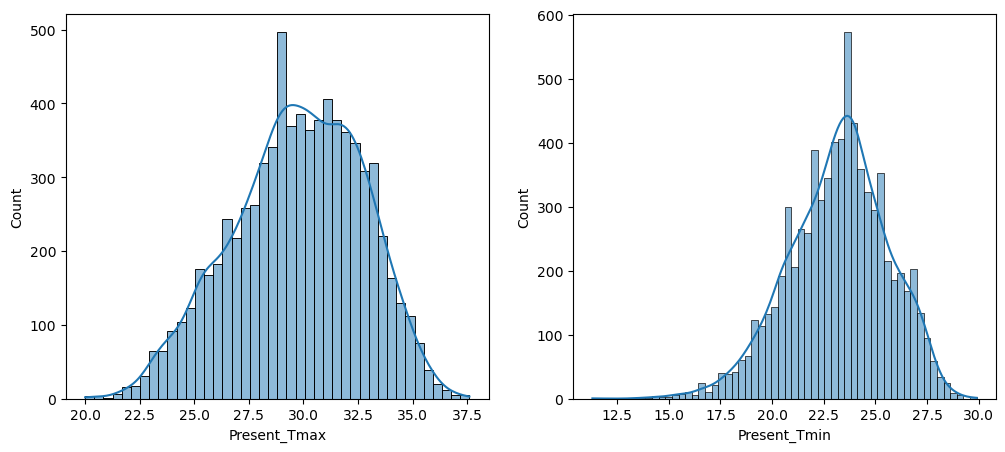

In [17]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,)
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True)
plt.show()

Observation:
    
From the above observation we can see thatFor majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree.


For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.

    


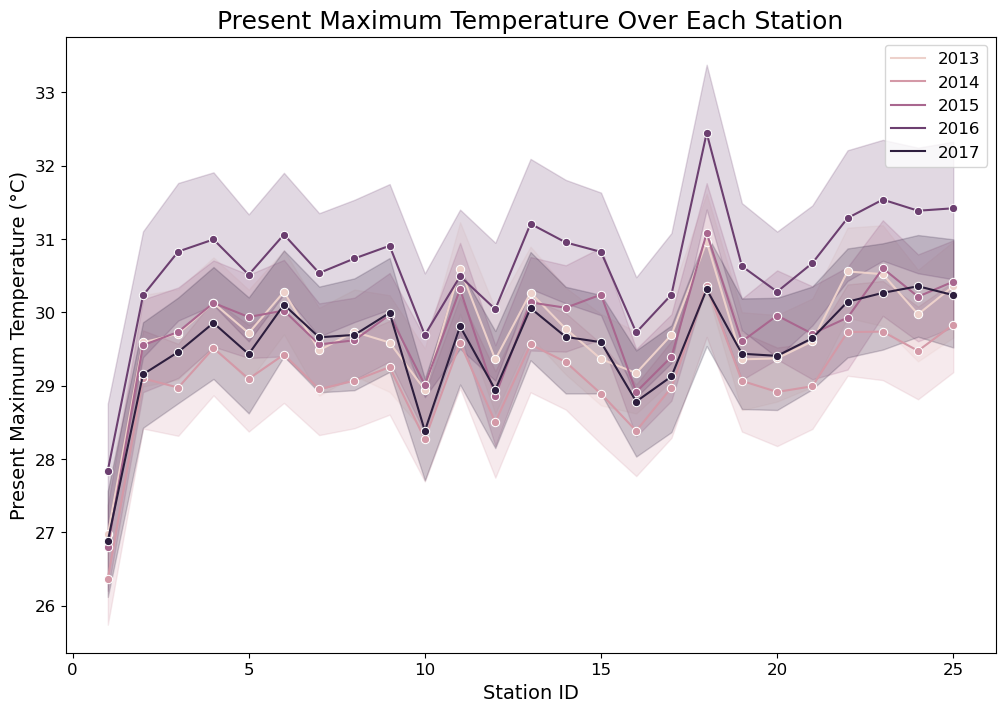

In [18]:
#Line Plot of Present Temperature Maximum over each Station
plt.figure(figsize=(12, 8))
sns.lineplot(x='station', y='Present_Tmax', data=df, hue='Year', marker='o')
plt.title('Present Maximum Temperature Over Each Station', fontsize=18)
plt.xlabel('Station ID', fontsize=14)
plt.ylabel('Present Maximum Temperature (°C)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

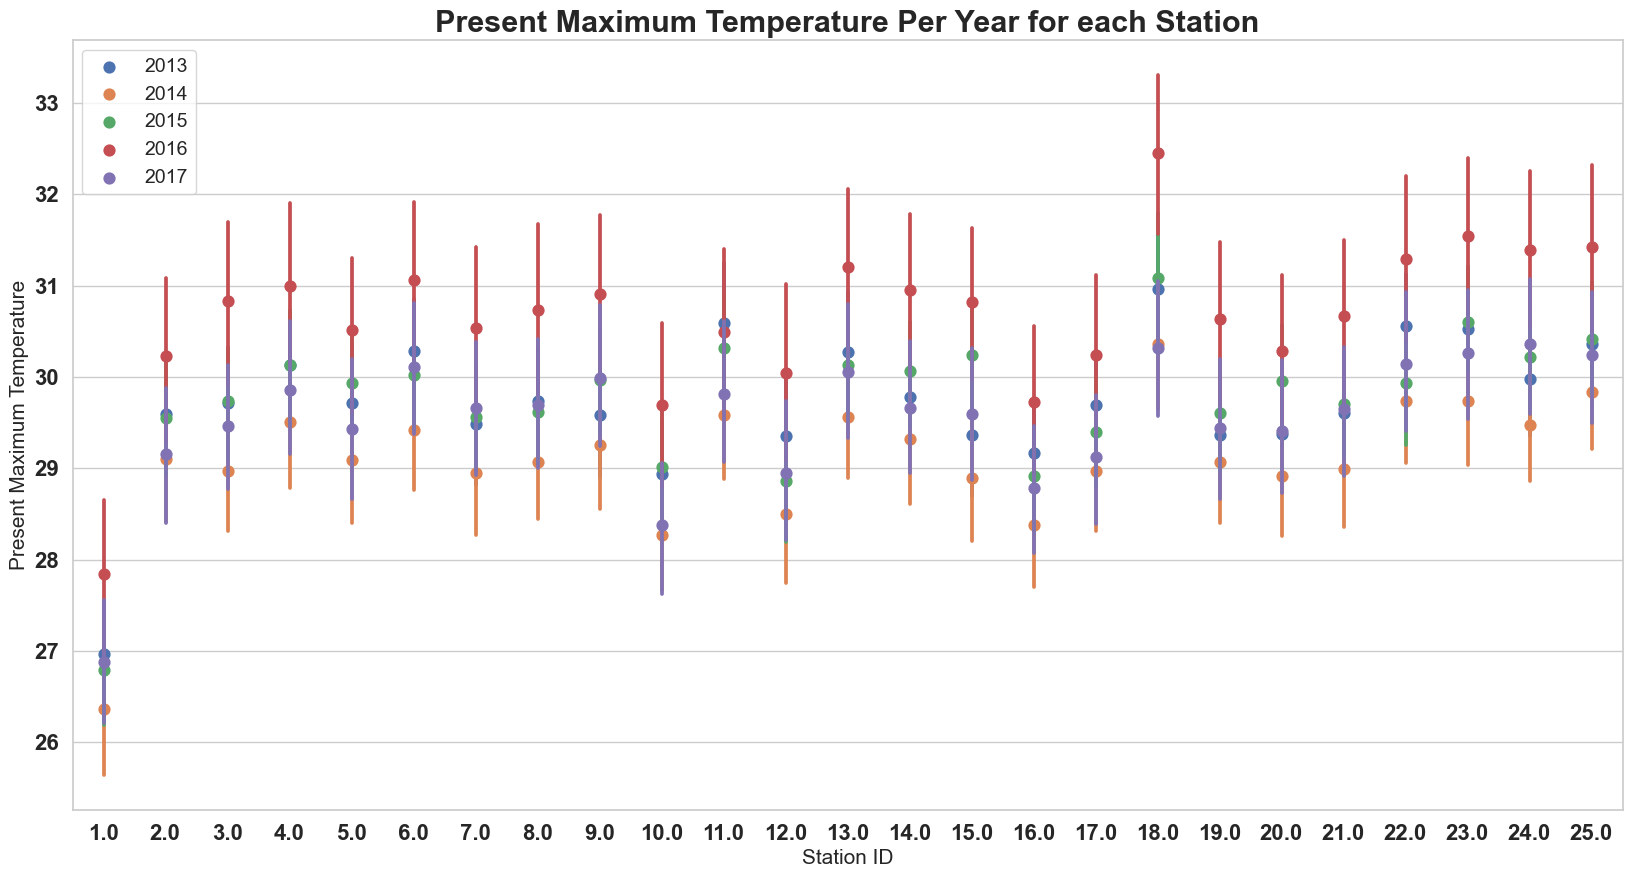

In [19]:
#point Plot of Present Temperature Maximum over each Station

sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year', join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID', fontsize = 15)
plt.ylabel('Present Maximum Temperature', fontsize =15)
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')
plt.legend(fontsize=14)
plt.show()


Observation:
    
From the above line and point plont we can observe that Over all in five-years,temperature at station 18 was higher than compare to others.

The coolest station of all time is Station 1.

2016 is hottest year and 2014 is coolest year.
  

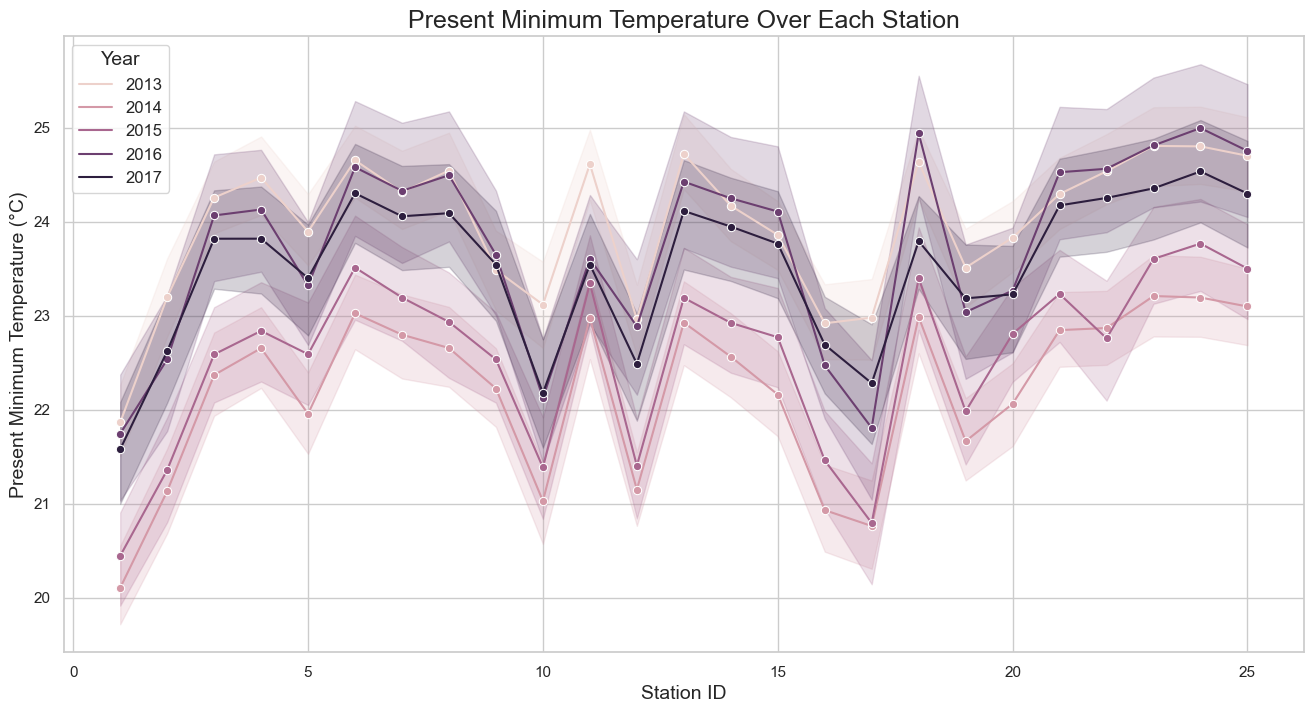

In [20]:
#Line Plot of Present Temperature Minimum over each Station

# Set the plot style
sns.set(style="whitegrid")

# Plotting a line plot
plt.figure(figsize=(16, 8))
sns.lineplot(x='station', y='Present_Tmin', data=df, hue='Year', marker='o')
plt.title('Present Minimum Temperature Over Each Station', fontsize=18)
plt.xlabel('Station ID', fontsize=14)
plt.ylabel('Present Minimum Temperature (°C)', fontsize=14)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.show()


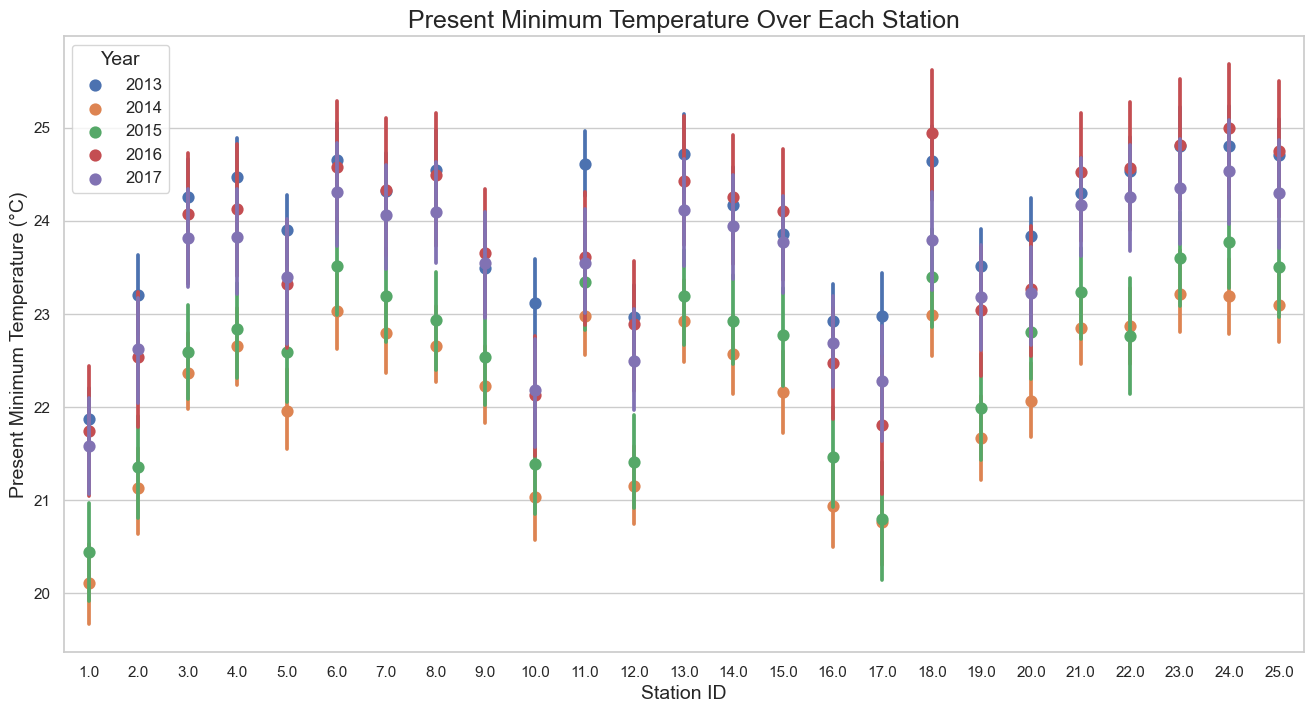

In [21]:
#point Plot of Present Temperature Minimum over each Station

# Set the plot style
sns.set(style="whitegrid")

# Plotting a point line plot
plt.figure(figsize=(16, 8))
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year', join=False)
plt.title('Present Minimum Temperature Over Each Station', fontsize=18)
plt.xlabel('Station ID', fontsize=14)
plt.ylabel('Present Minimum Temperature (°C)', fontsize=14)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.show()

Observation: line and point plot 
    
The coolest year of all time is 2014.

Despite not having the highest current maximum temperature, Station 24 recorded the highest current minimum temperature. This suggests that station 24's minimum temperature dropped during the course of the day.

The greatest station of all time is station 1, which is followed by station 17. Must be a summertime tourist destination.
    


# Target Variable

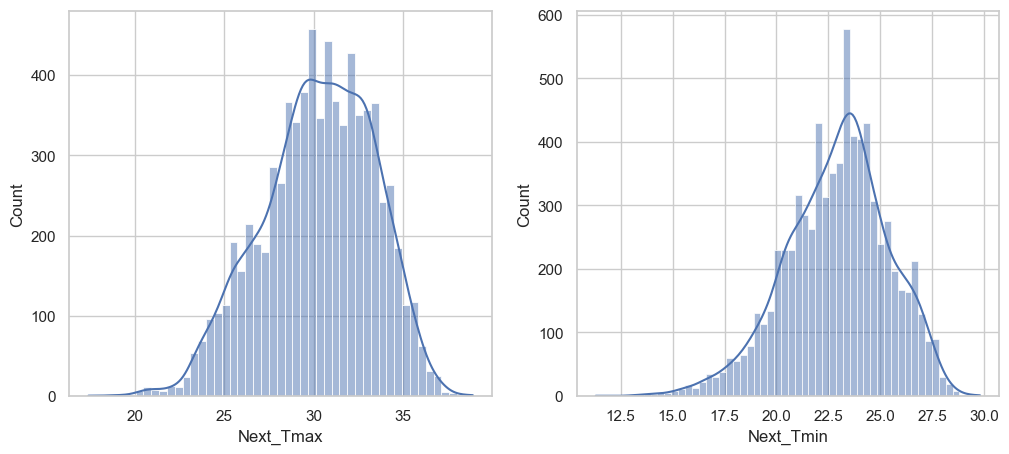

In [22]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True)
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True)
plt.show()

Observation:
    
From the  above observation we almost got the same result as well as we get in ther present temperature.

From the above observation we can see thatFor majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree.

For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.


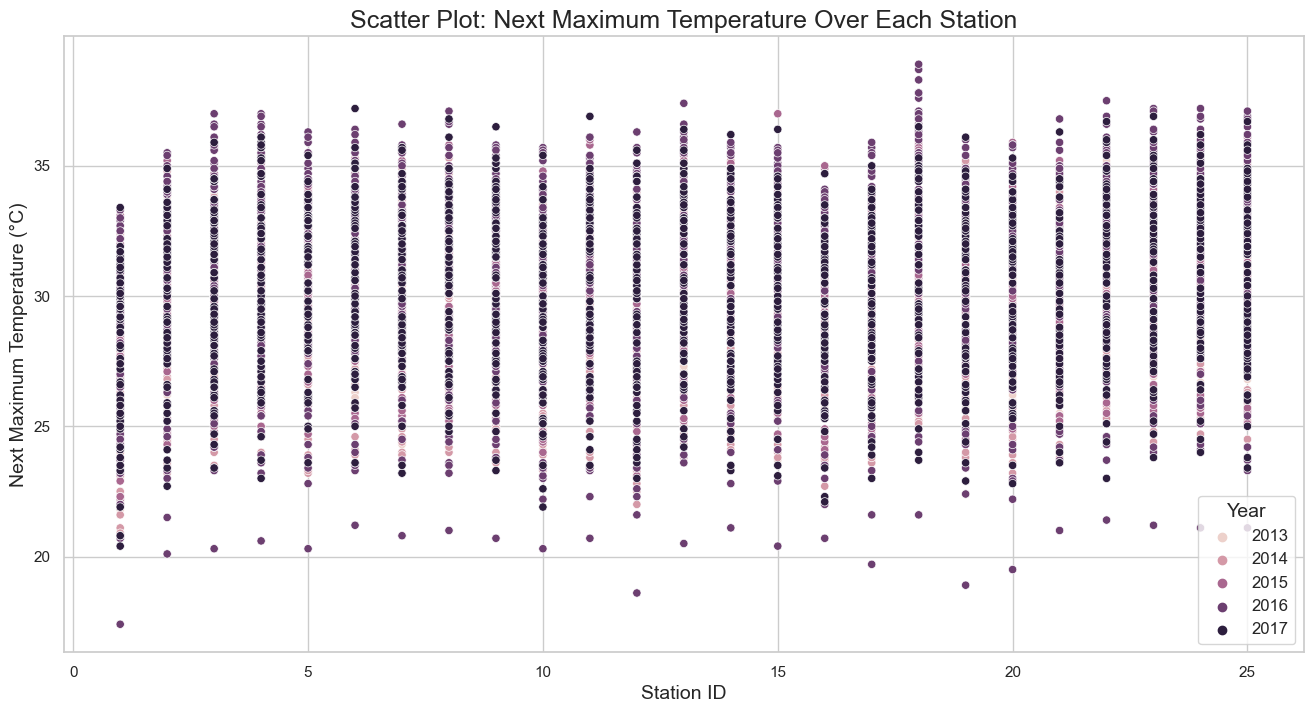

In [23]:
# Visualizing the realtion between station and Next_Tmax

# Set the plot style
sns.set(style="whitegrid")

# Scatter plot for Next_Tmax
plt.figure(figsize=(16, 8))
sns.scatterplot(x='station', y='Next_Tmax', data=df, hue='Year', marker='o')
plt.title('Scatter Plot: Next Maximum Temperature Over Each Station', fontsize=18)
plt.xlabel('Station ID', fontsize=14)
plt.ylabel('Next Maximum Temperature (°C)', fontsize=14)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.show()

Obsevation:

As we can see, station 18 has collected the most temperature for the Next_Tmax

next day maximum temparature is high & low at station 18 & 10 respectively.



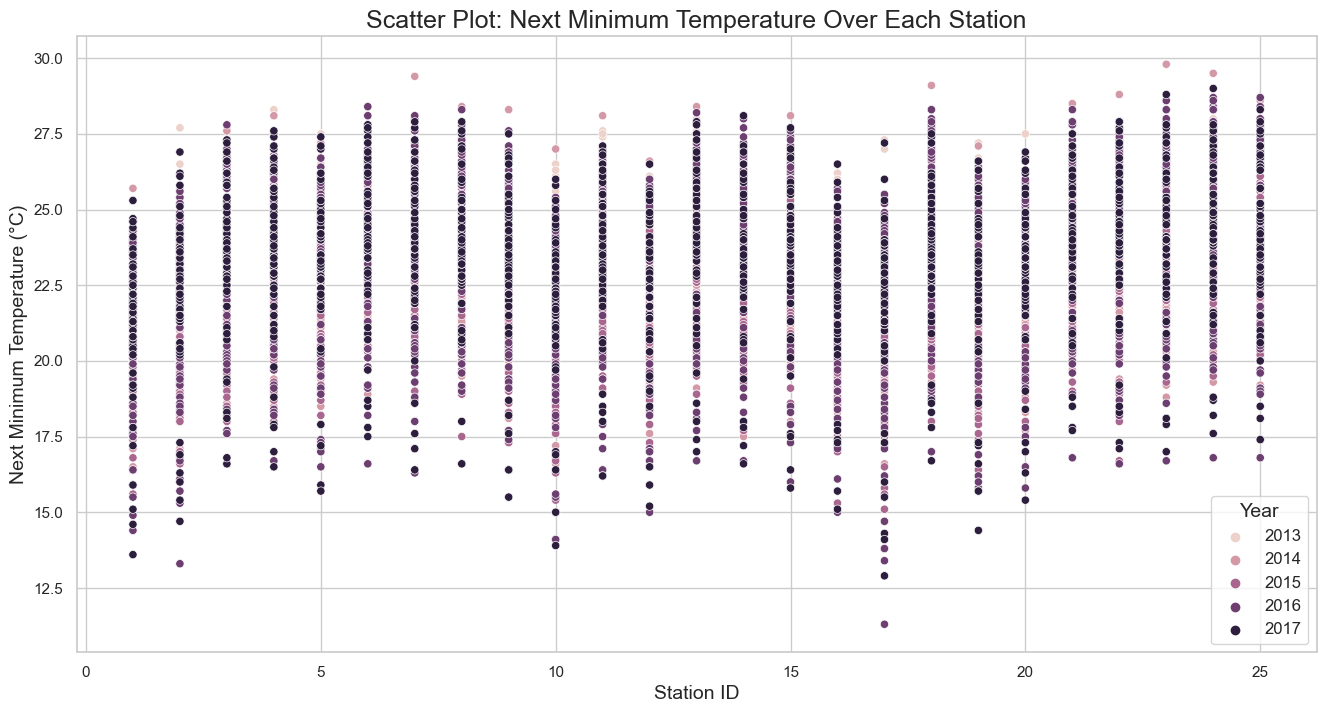

In [24]:
# Visualizing the realtion between station and Next_Tmin

# Set the plot style
sns.set(style="whitegrid")

# Scatter plot for Next_Tmin
plt.figure(figsize=(16, 8))
sns.scatterplot(x='station', y='Next_Tmin', data=df, hue='Year', marker='o')
plt.title('Scatter Plot: Next Minimum Temperature Over Each Station', fontsize=18)
plt.xlabel('Station ID', fontsize=14)
plt.ylabel('Next Minimum Temperature (°C)', fontsize=14)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.show()

Obsevation:
    
As we can see, station 18 has collected the most temperature for the Next_Tmin 

Station 17 has the greatest temperature differential within the same station.

# Next Maximum Temperature Vs Cloud cover

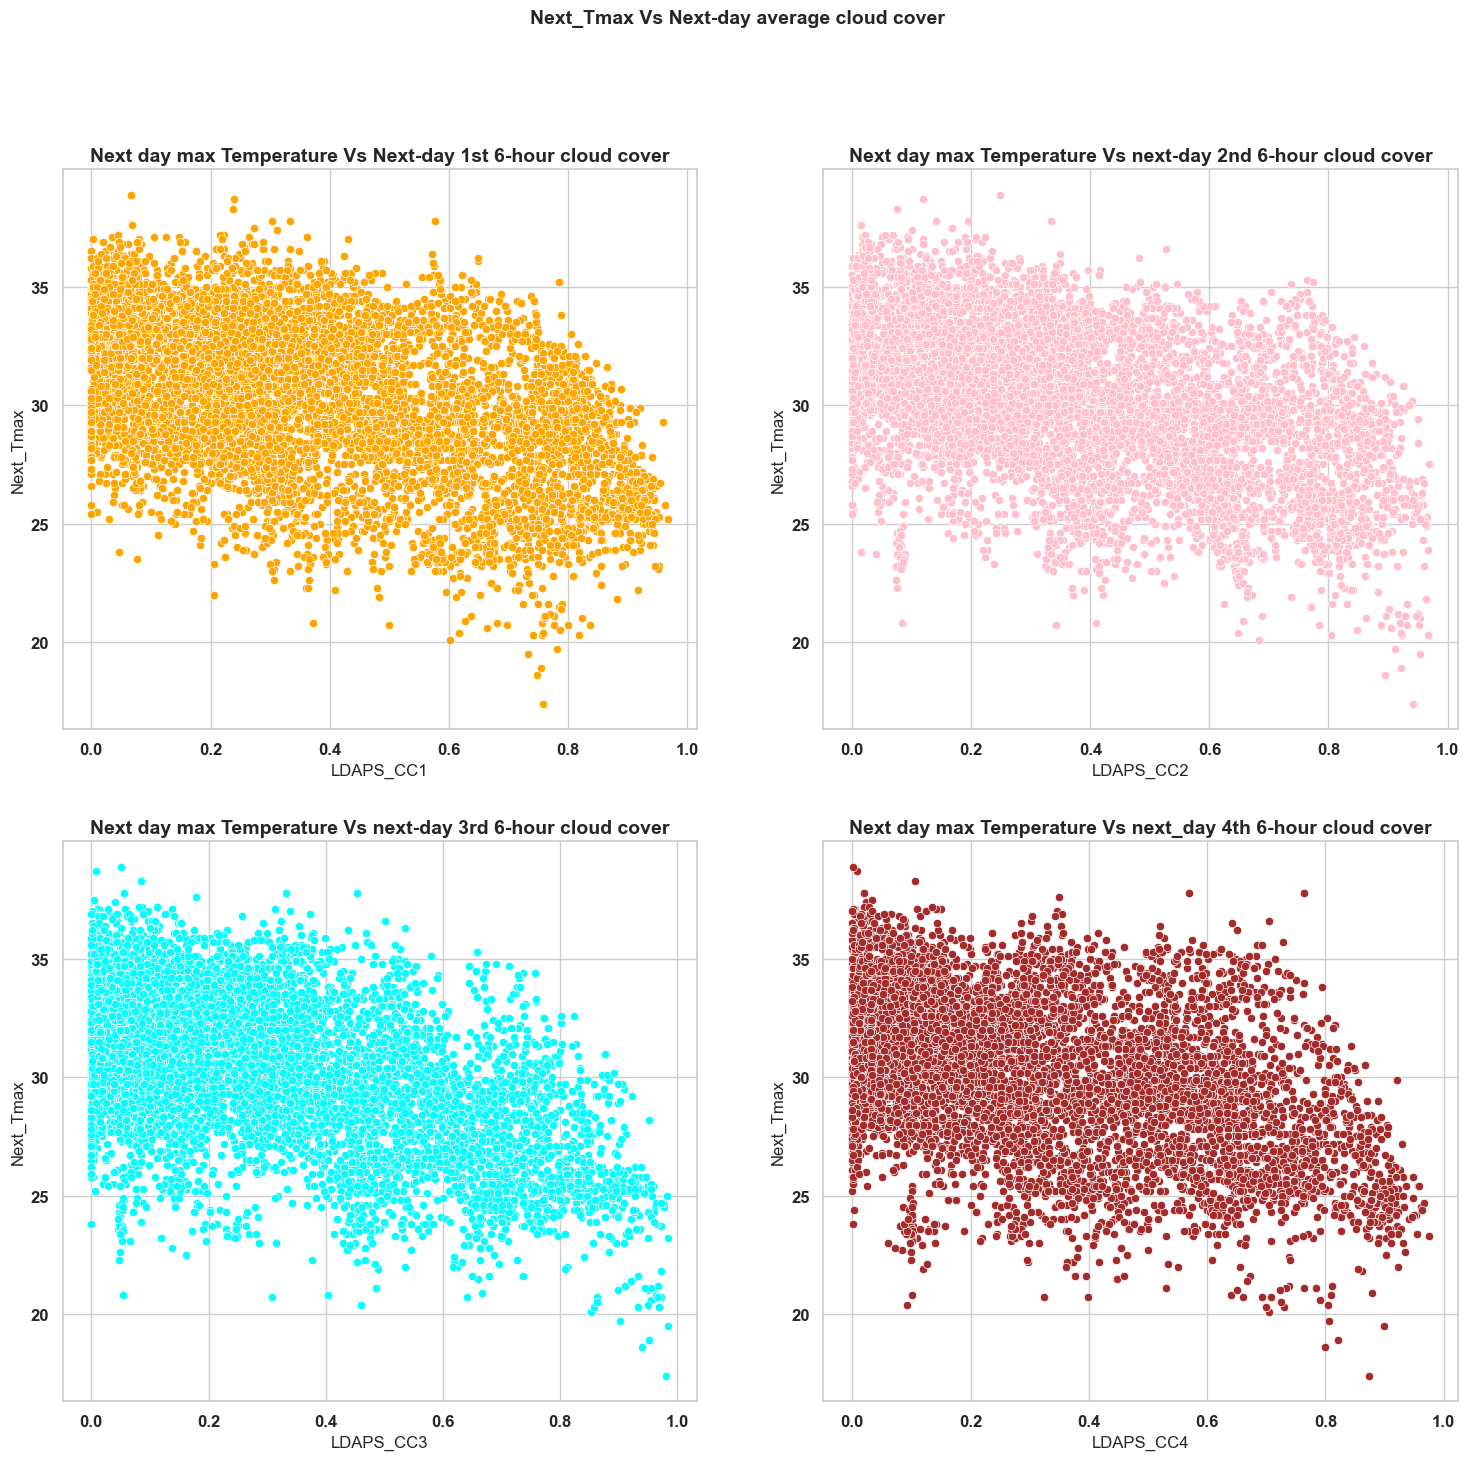

In [25]:
plt.figure(figsize=(18, 16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover', fontsize=14, fontweight='bold')

plt.subplot(2, 2, 1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1', y='Next_Tmax', data=df, color="orange")  # Changed color to orange
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.subplot(2, 2, 2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2', y='Next_Tmax', data=df, color='pink')  # Changed color to pink
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.subplot(2, 2, 3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3', y='Next_Tmax', data=df, color='cyan')  # Changed color to cyan
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.subplot(2, 2, 4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4', y='Next_Tmax', data=df, color="brown")  # Changed color to brown
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


Observation:

Next-day Temperature Maximum decreases as cloud cover exceeds 0.6 regardless of 6 hr quarter in 24 hr day time.

# Next Minimum Temperature Vs Cloud cover

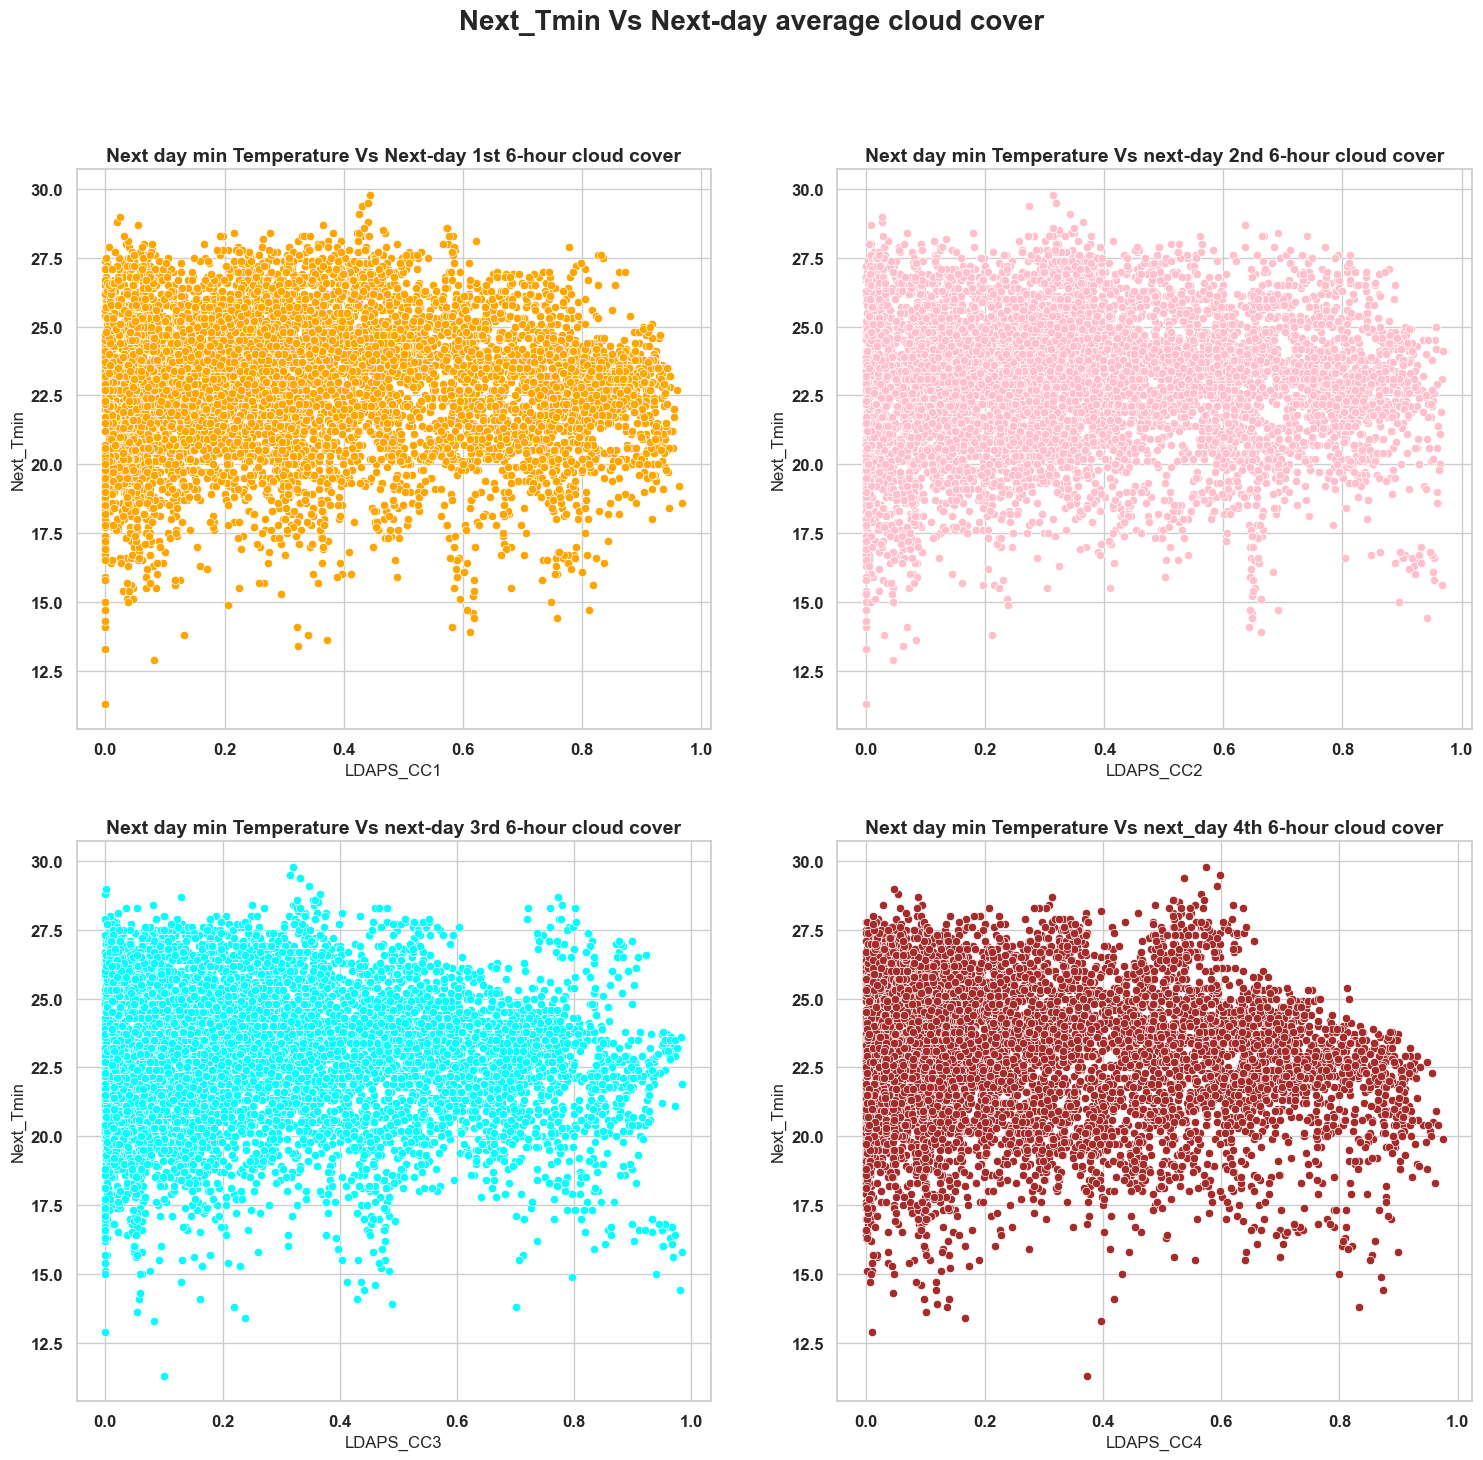

In [26]:
plt.figure(figsize=(18, 16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover', fontsize=20, fontweight='bold')

plt.subplot(2, 2, 1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1', y='Next_Tmin', data=df, color="orange")  # Changed color to orange
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.subplot(2, 2, 2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2', y='Next_Tmin', data=df, color='pink')  # Changed color to pink
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.subplot(2, 2, 3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3', y='Next_Tmin', data=df, color='cyan')  # Changed color to cyan
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.subplot(2, 2, 4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover', fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4', y='Next_Tmin', data=df, color="brown")  # Changed color to brown
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()


Observation:
    
In the scatterplot, there is no significant relationship between Next_Tmin and cloud cover.

We can say that cloud cover has no effect on Next_Tmin.

# Solar radiation on Cloud cover 

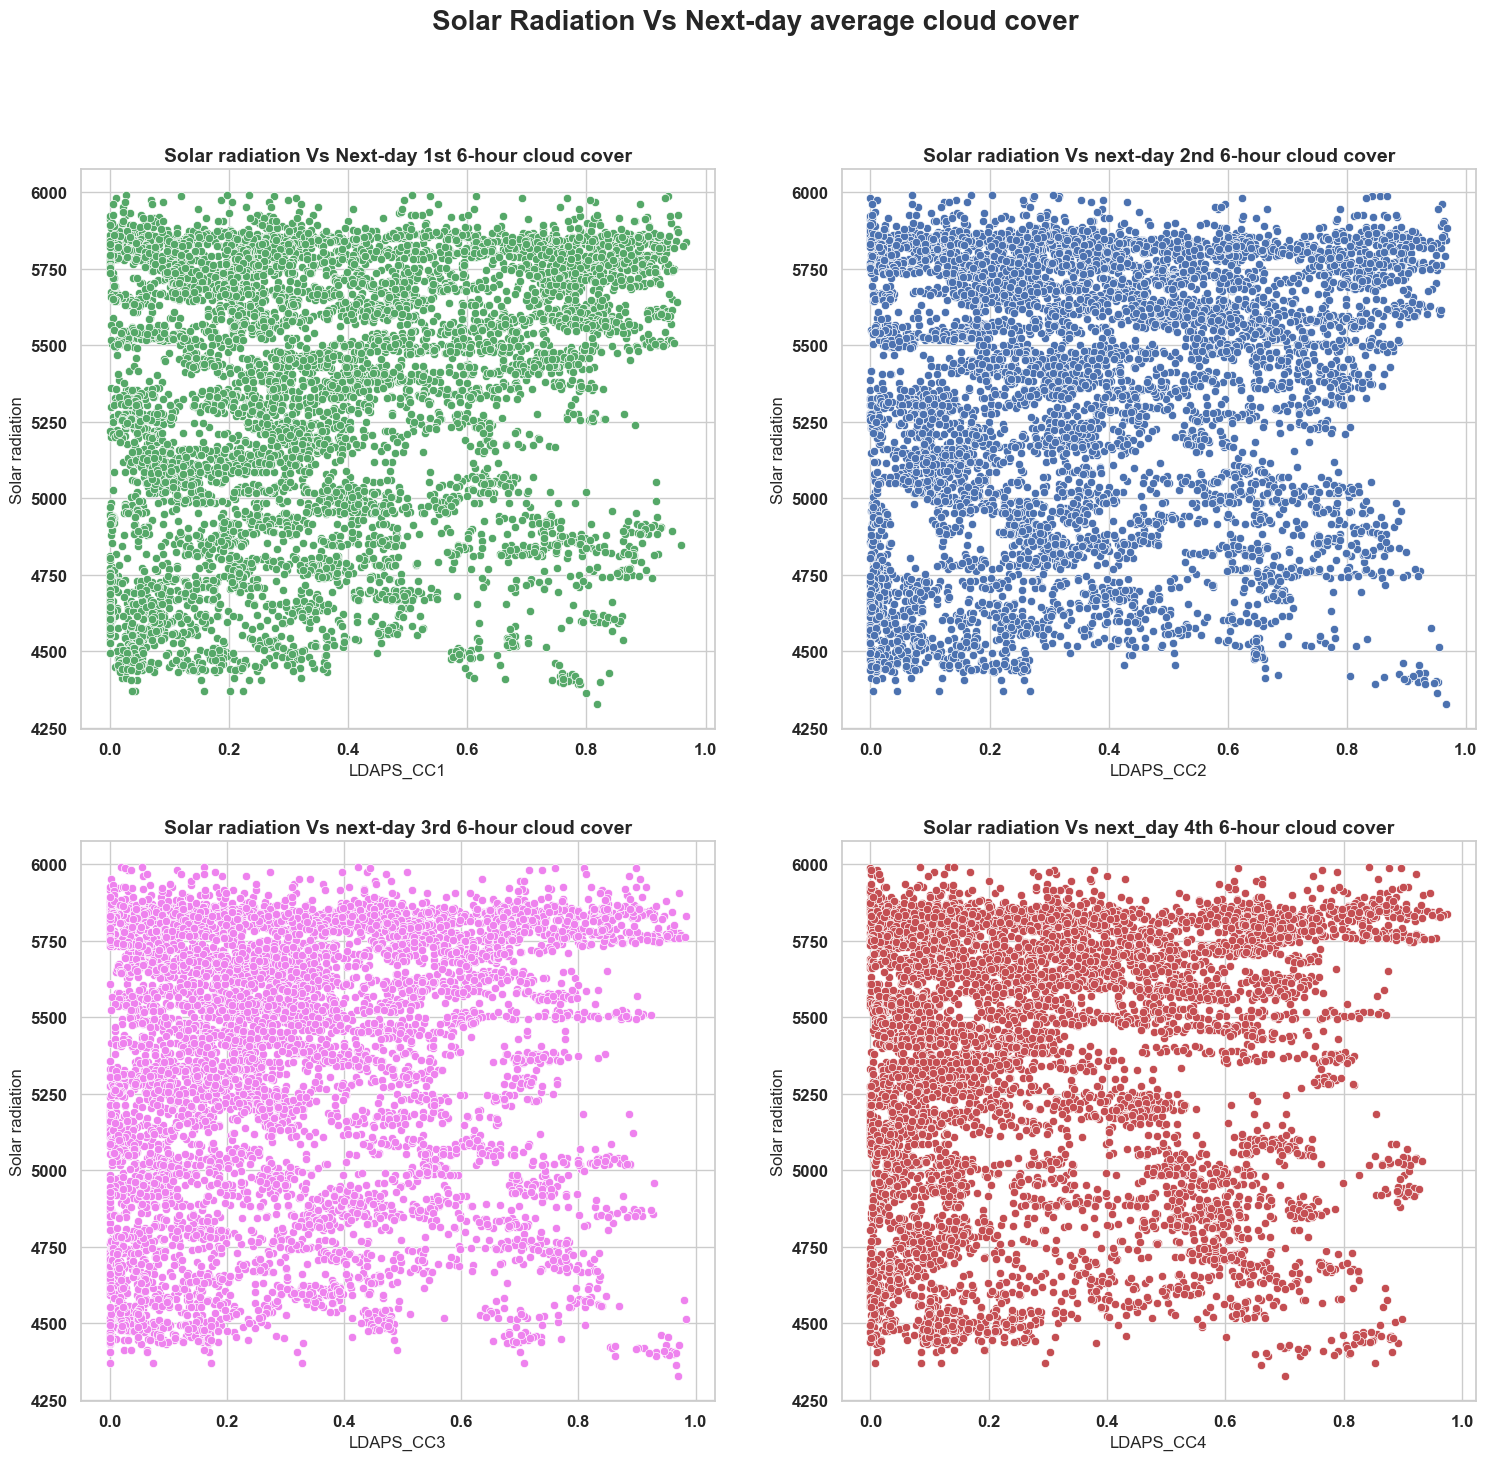

In [27]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

Observation:
    
We can definitely say that for cloud cover greater than 0.7 high value solar radiation contributed most.

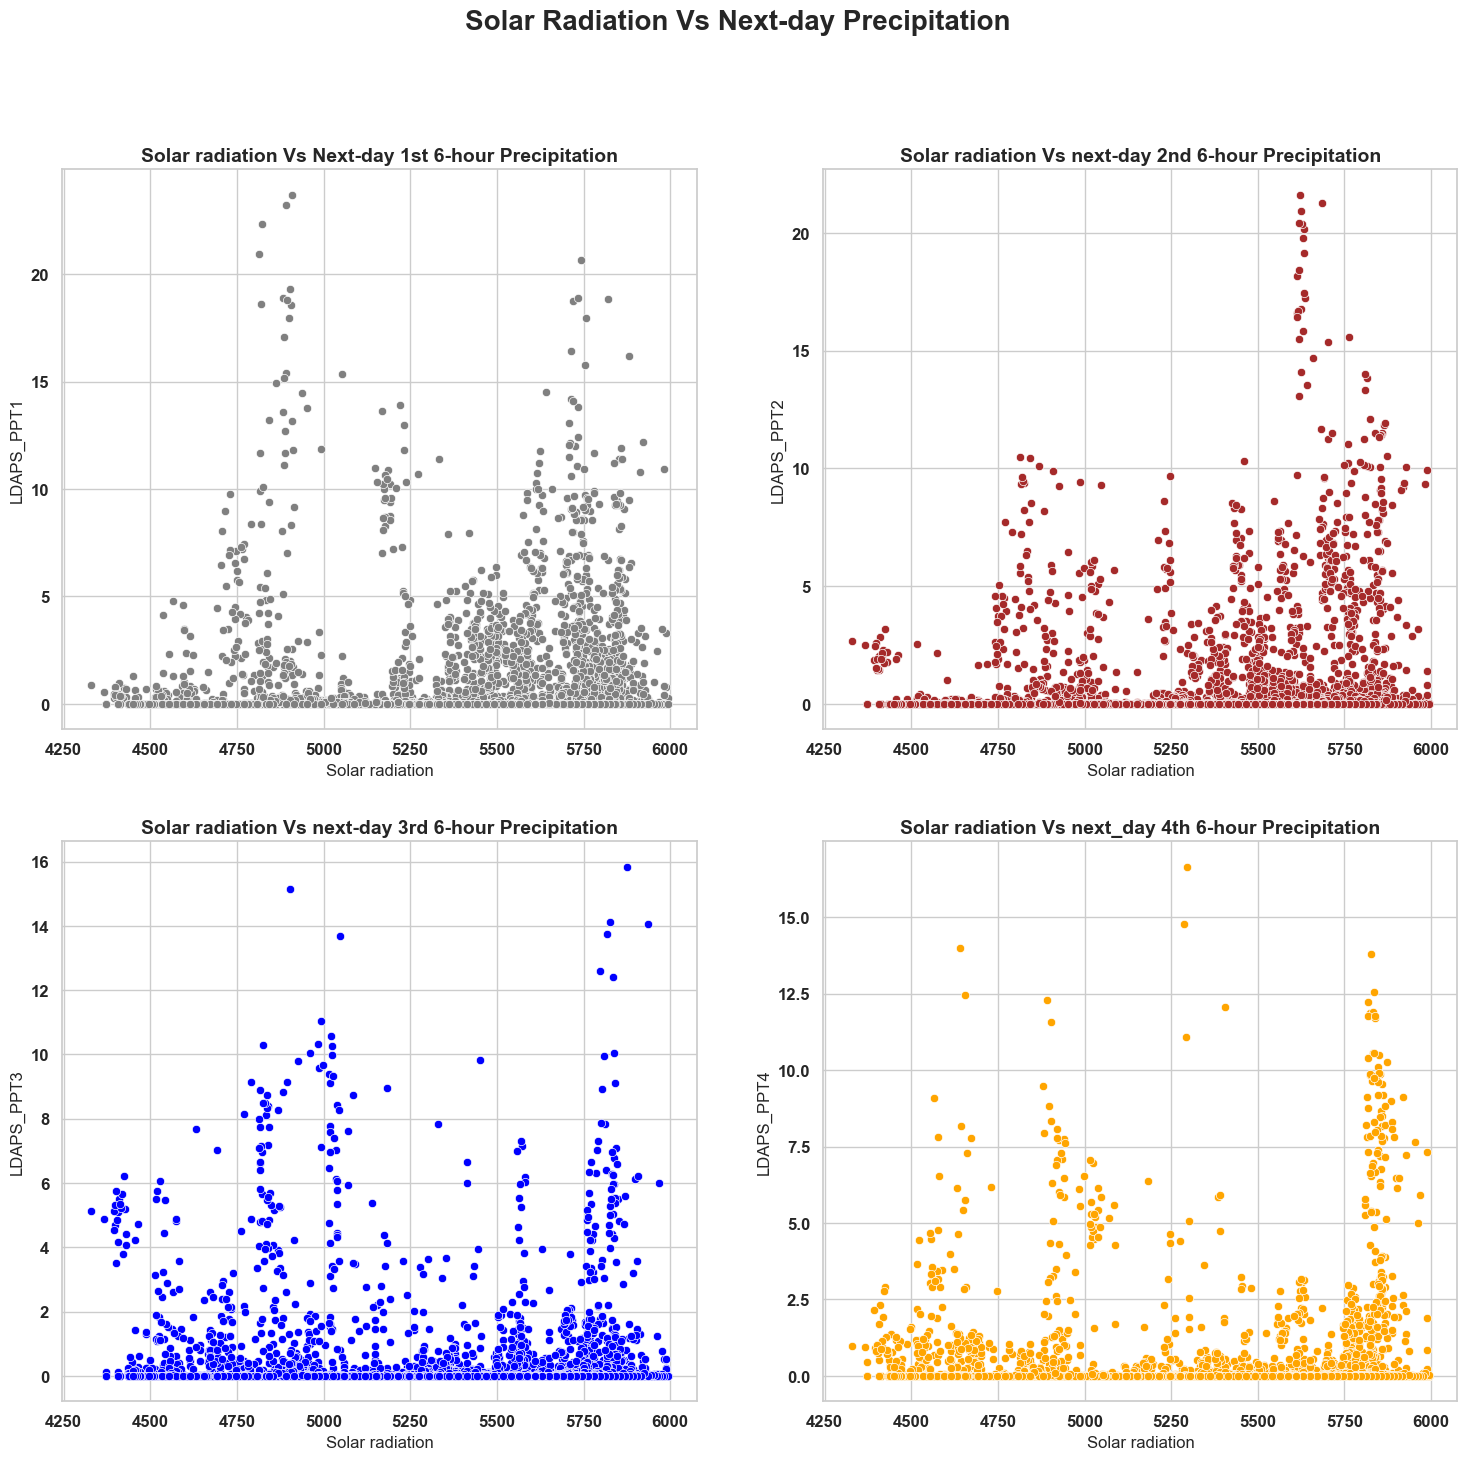

In [28]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

Observation:
    
Regardless of whatever 6 hr quarter data is used, solar radiation values greater than 5500w/m2 result in more precipitation (usually greater than 8).

If we evaluate the scatterplot of solar radiation versus cloud cover in conjunction with the above- mentioned scatter plot, we can conclude that with greater values of solar radiation, cloud cover and precipitation followed each other. In other words, more precipitation equals more cloud cover.


This all give rise to few questions here :
Where relative humidity and wind speed fit in this equation of precipitation?

Latent heat means heat absorption at constant temperature, there has to some effect of latent heat flux variation on relative humidity.

Another interesting thing to look forward is wind tend to blow clound. What is wind speed value in relative terms when cloud cover is high?

What is variation in precipitation,cloud cover and wind speed over year period?

Variation of temperature over duration of one year period?

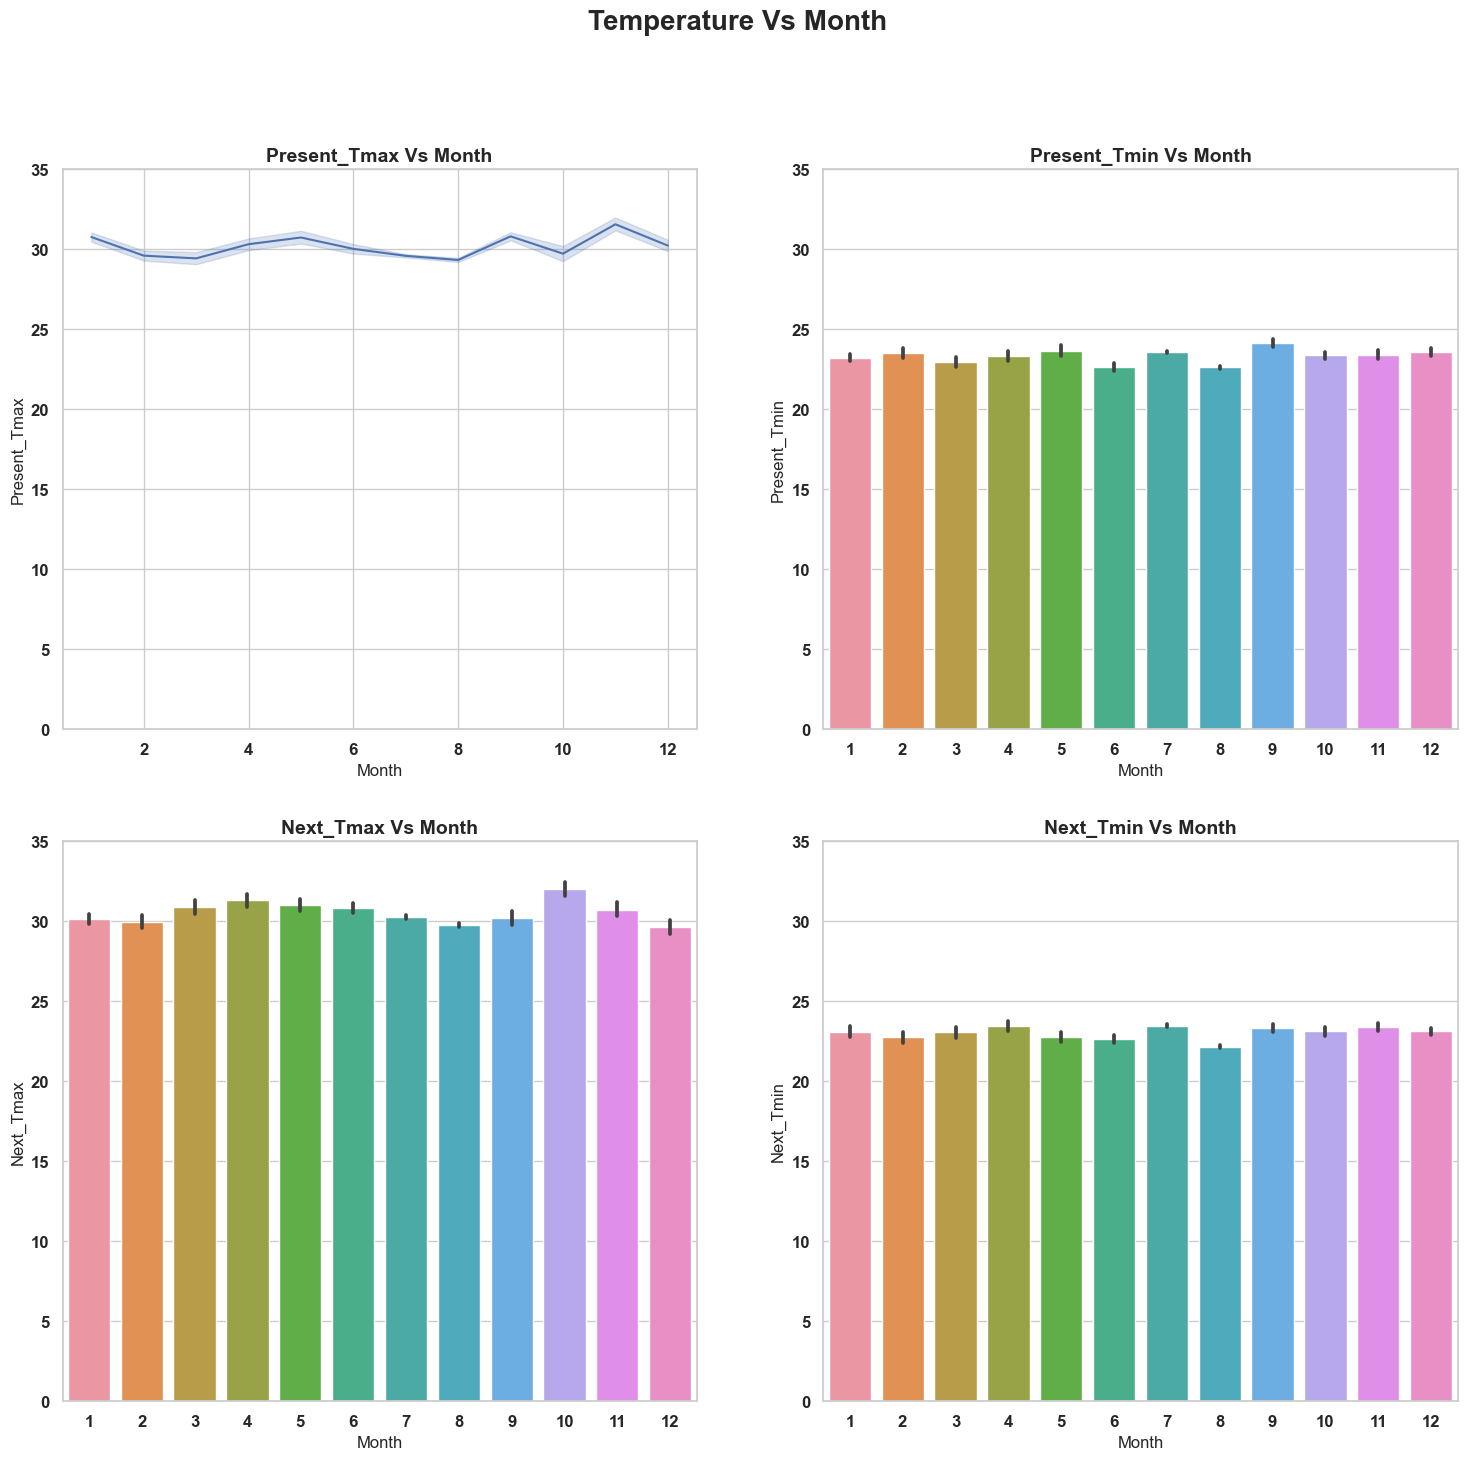

In [29]:

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

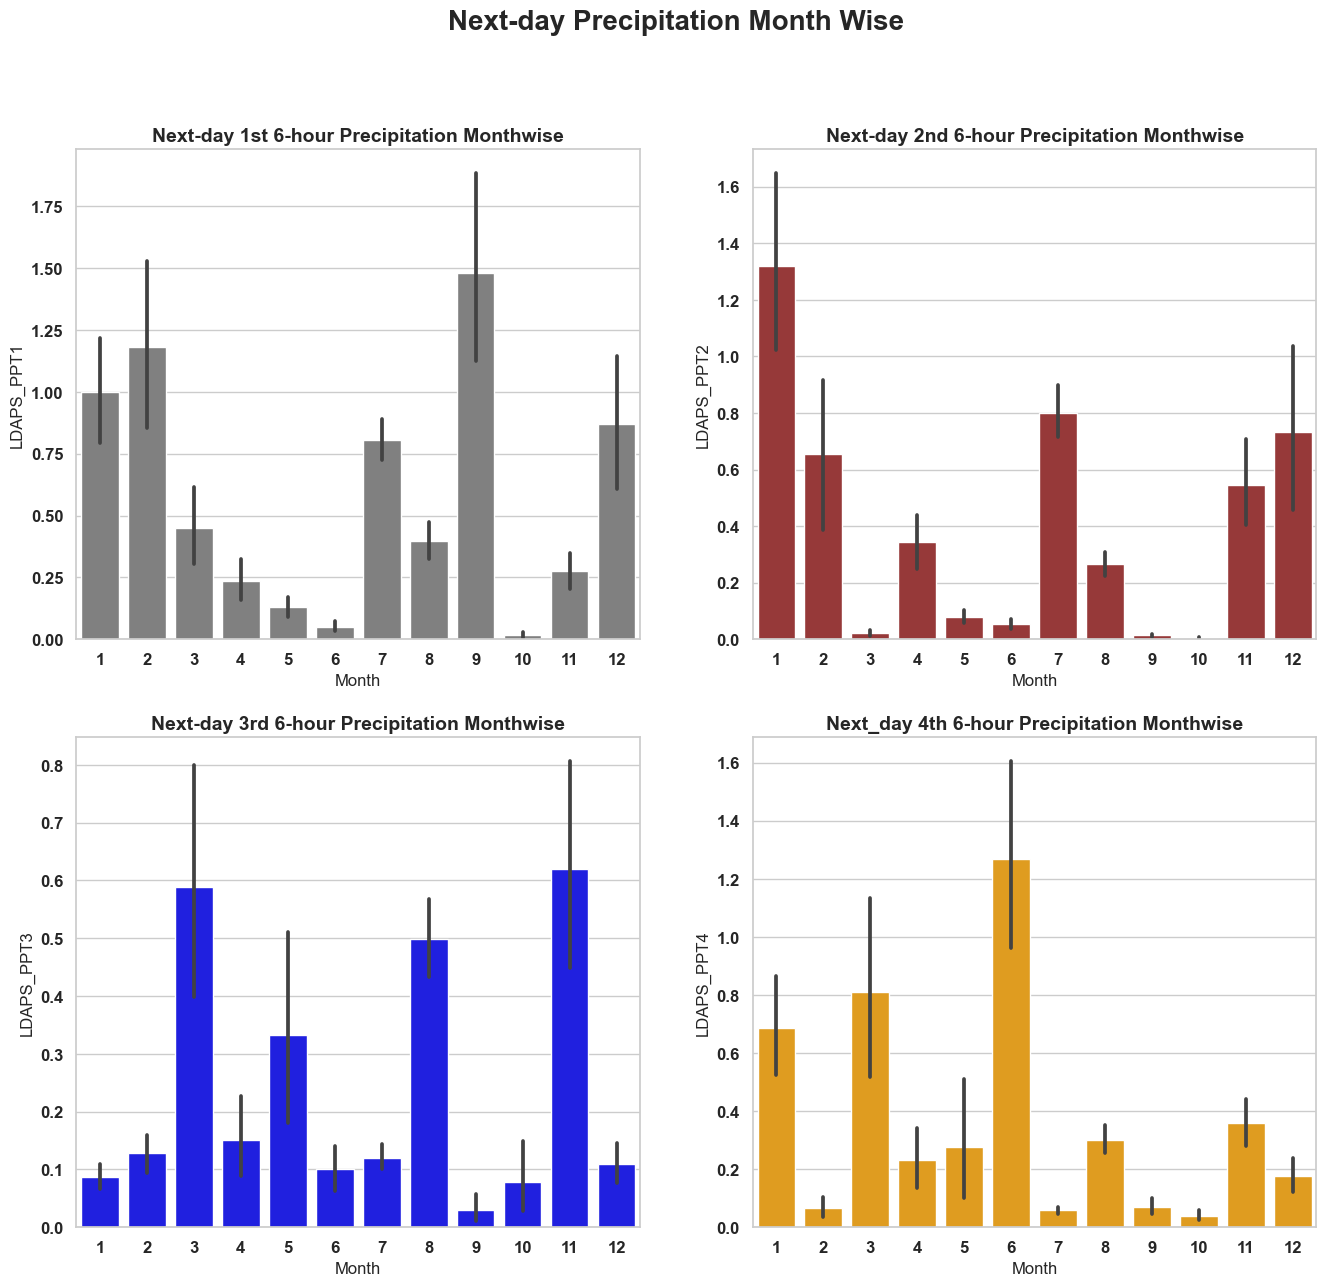

In [30]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

ovservation:
    
In the ninth month, the most precipitation is recorded in the 1st quater of the day.

The 2nd quarter of the day receives the most precipitation throughout the 1st month.

In the 11th month, the most precipitation was recorded in the 3rd quater of the day.

In the 6th month, the most precipitation is recorded in the 4th quater of the day.

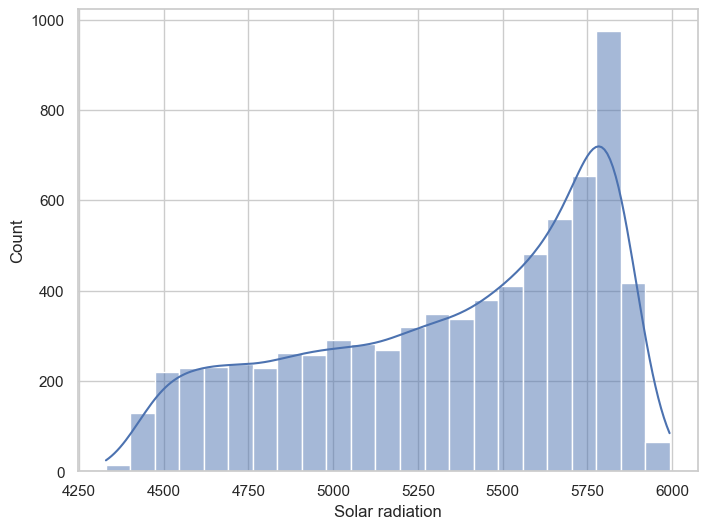

In [31]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True)
plt.show()

In [32]:
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.72420785672


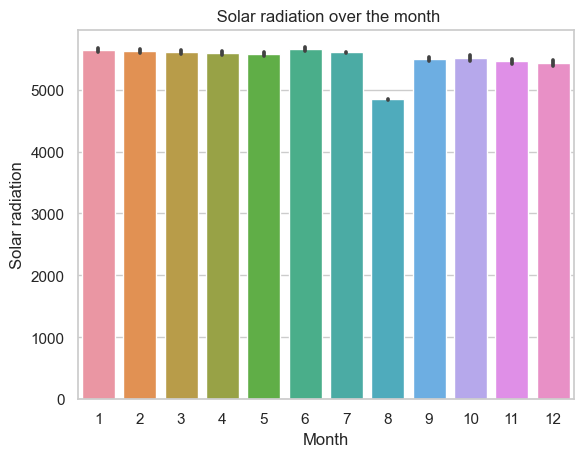

In [33]:
#lets comapre the Solar radiation over the month

sns.barplot(x=df['Month'], y=df['Solar radiation'])
plt.title(" Solar radiation over the month")
plt.show()

Observation:

We can  observe that the 8th month of the year is minimum solar radiation and 6th and 7th month almost maximum solar radion. cleary shows that summer have maximum solar radiation as compare to the winters.

It has its minimum value at 4329.52 Wh/m2 and maximum values at 5992.89 Wh/m2.

For most of reading solar radiation values lies in the range 5600 to 5850.

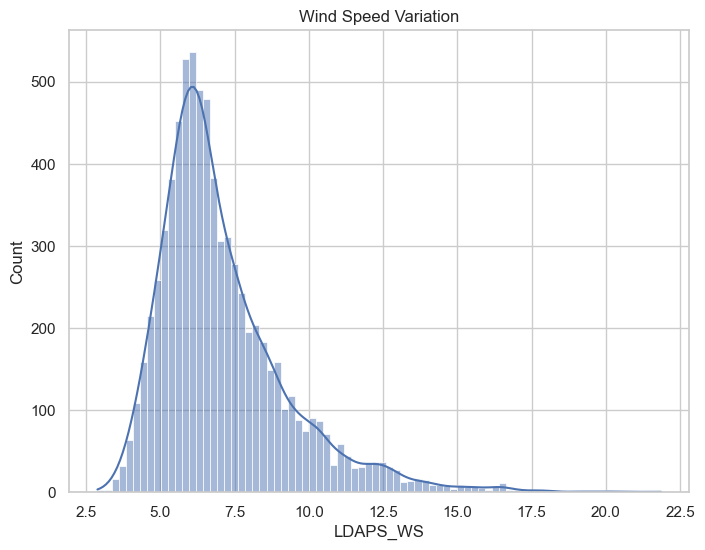

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,)
plt.title('Wind Speed Variation')
plt.show()

In [35]:
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.094096699159837 m/s


Observation :
    
The minimum value at 2.88m/s and maximum values at 21.85m/s of wind speed.

For most of reading values lies in the range between 5m/s to 8m/s.

Graph is slightly right skewed.

Text(0.5, 1.0, 'Minimum relative humidity (%)')

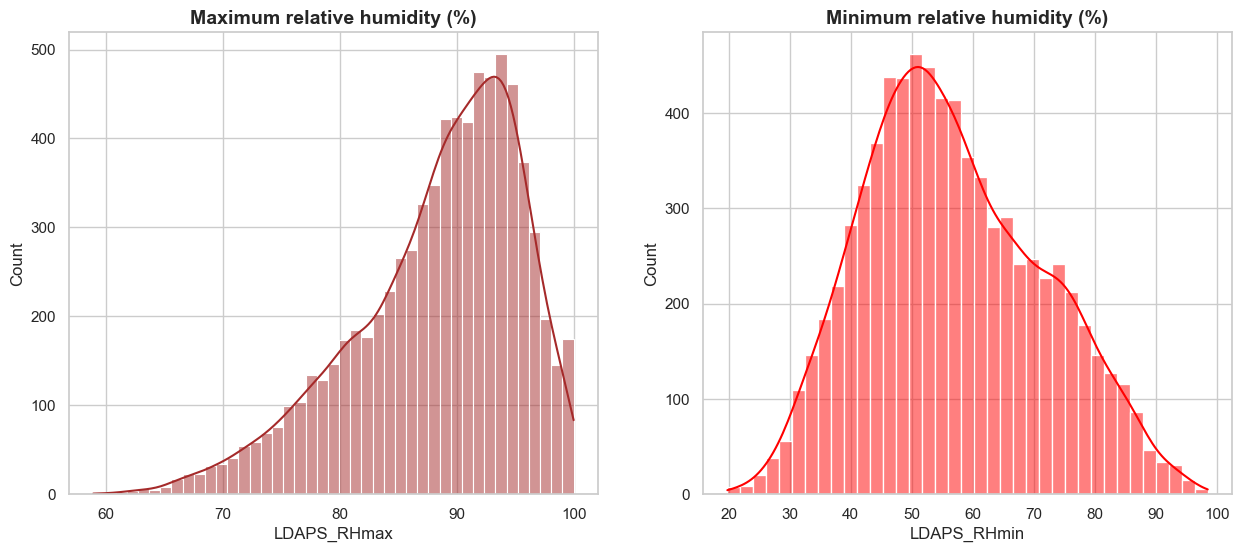

In [36]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='brown')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='red')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')

In [37]:
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


Observation:
    
Comment :
Data of Maximum Relative humidity is left skewed and Data of Minimum Relative humidity is slightly right skewed.

Maximum Relative humidity for most of the days lie in the range 90 to 97

Maximum Relative humidity lies in the range 45 to 62.

Minimum Tmax applied lapse rate is 17.62495378 (°C) and Maximum Tmax applied lapse rate is 38.54225522 (°C)
Minimum Tmin is applied lapse rate 14.27264631 (°C) and Maximum Tmin applied lapse rate is 29.61934244 (°C)


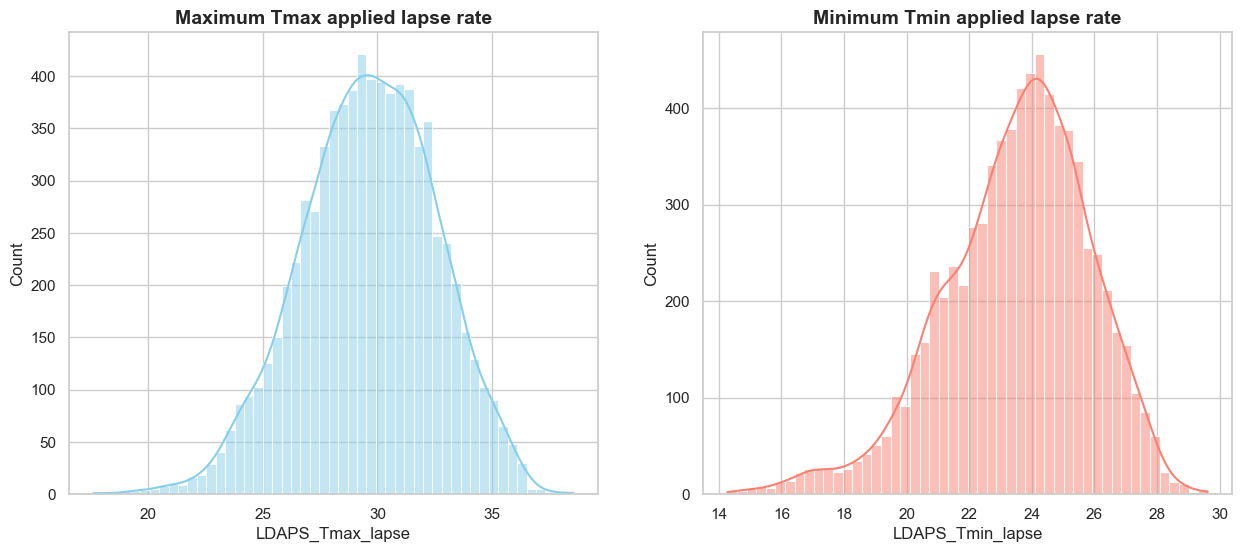

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Subplot 1
plt.subplot(1, 2, 1)
sns.histplot(df['LDAPS_Tmax_lapse'], kde=True, color='skyblue')  # Change color to sky blue
plt.title('Maximum Tmax applied lapse rate', fontsize=14, fontweight='bold')

# Subplot 2
plt.subplot(1, 2, 2)
sns.histplot(df['LDAPS_Tmin_lapse'], kde=True, color='salmon')  # Change color to salmon
plt.title('Minimum Tmin applied lapse rate', fontsize=14, fontweight='bold')

# Print statements
print('Minimum Tmax applied lapse rate is {} (°C) and Maximum Tmax applied lapse rate is {} (°C)'.format(df['LDAPS_Tmax_lapse'].min(), df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (°C) and Maximum Tmin applied lapse rate is {} (°C)'.format(df['LDAPS_Tmin_lapse'].min(), df['LDAPS_Tmin_lapse'].max()))

plt.show()


Observation:

The applied lapse rate for both Tmax and Tmin exhibits a nearly normal distribution. Specifically, Tmax_lapse predominantly falls within the range of 27 to 33 (°C) for the majority of days, while Tmin_lapse tends to center around 23 to 26 (°C) for the majority of observed days.

Minimum Latent Heat Flux: -13.60321209
Maximum Latent Heat Flux: 213.4140062
Average Latent Heat Flux: 62.492606287988046


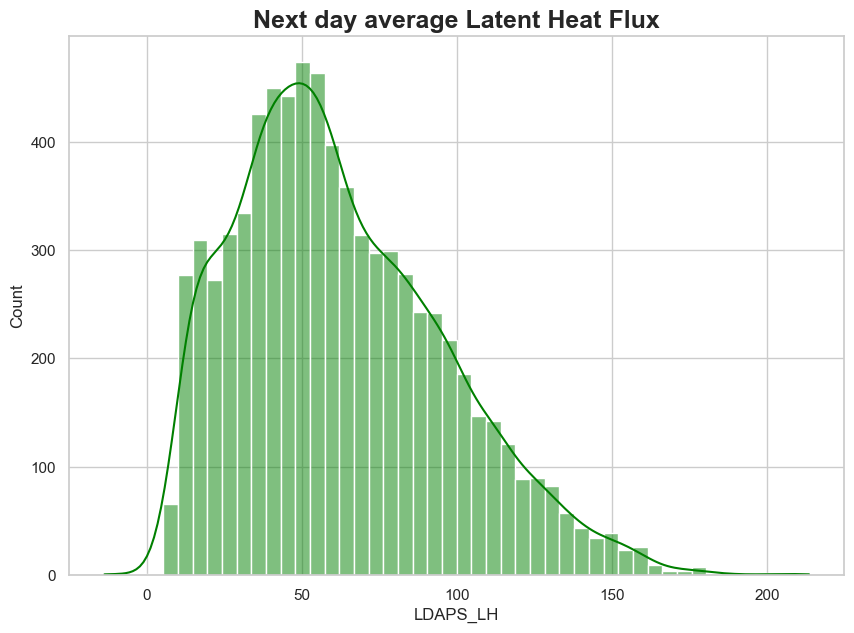

In [39]:
plt.figure(figsize=(10, 7))
sns.histplot(df['LDAPS_LH'], kde=True, color='green')  
plt.title('Next day average Latent Heat Flux', fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux:', df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux:', df['LDAPS_LH'].max())
print('Average Latent Heat Flux:', df['LDAPS_LH'].mean())

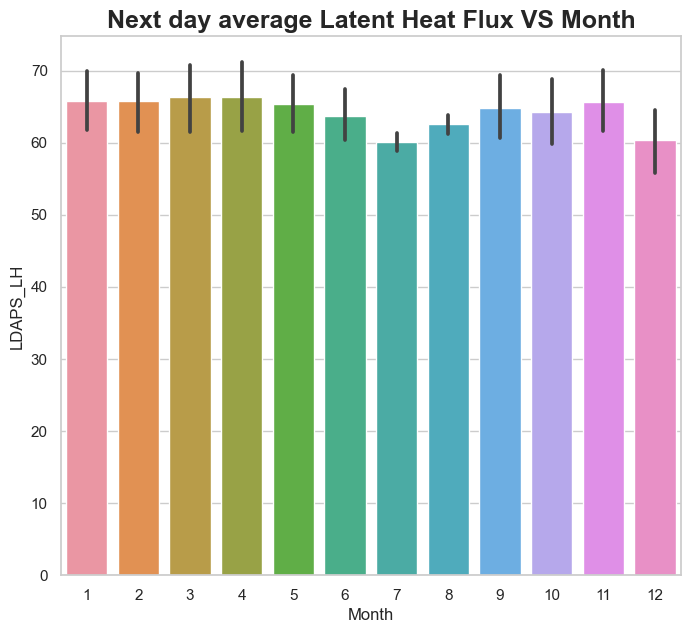

In [40]:
plt.figure(figsize=(8,7))
sns.barplot(y=df['LDAPS_LH'], x=df['Month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=18, fontweight='bold')
plt.show()

Minimum Latent Heat Flux observe in month of July.

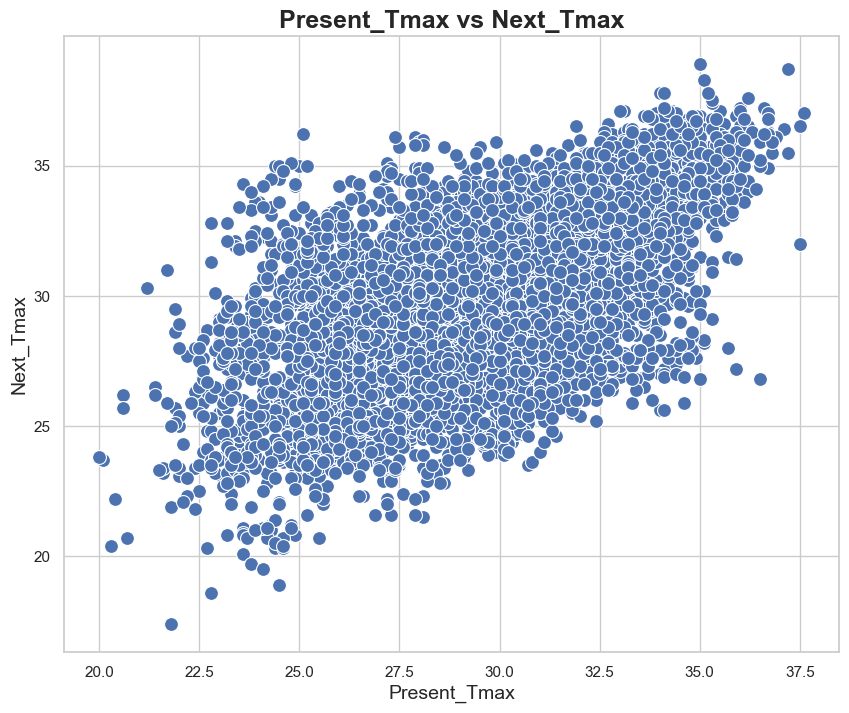

In [41]:


plt.figure(figsize=(10, 8))
sns.scatterplot(x='Present_Tmax', y='Next_Tmax', data=df, palette='viridis', s=100)
plt.title('Present_Tmax vs Next_Tmax', fontsize=18, fontweight='bold')
plt.xlabel('Present_Tmax', fontsize=14)
plt.ylabel('Next_Tmax', fontsize=14)

plt.show()


Here we can observe when Present_Tmax is increasing Nex_Tmax is also getting higher

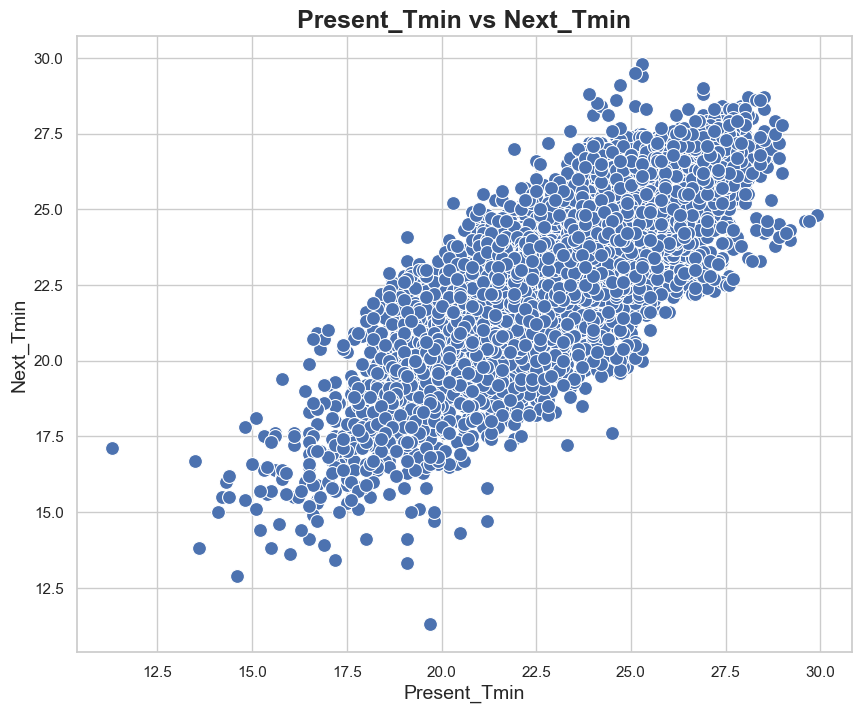

In [42]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Present_Tmin', y='Next_Tmin', data=df, palette='viridis', s=100)
plt.title('Present_Tmin vs Next_Tmin', fontsize=18, fontweight='bold')
plt.xlabel('Present_Tmin', fontsize=14)
plt.ylabel('Next_Tmin', fontsize=14)

plt.show()

Here we can observe when Present_Tmin In decreasing , Next_Tmin also getting lower

In [43]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

# Feature selection and Engineering
Outliers Detection and Removal

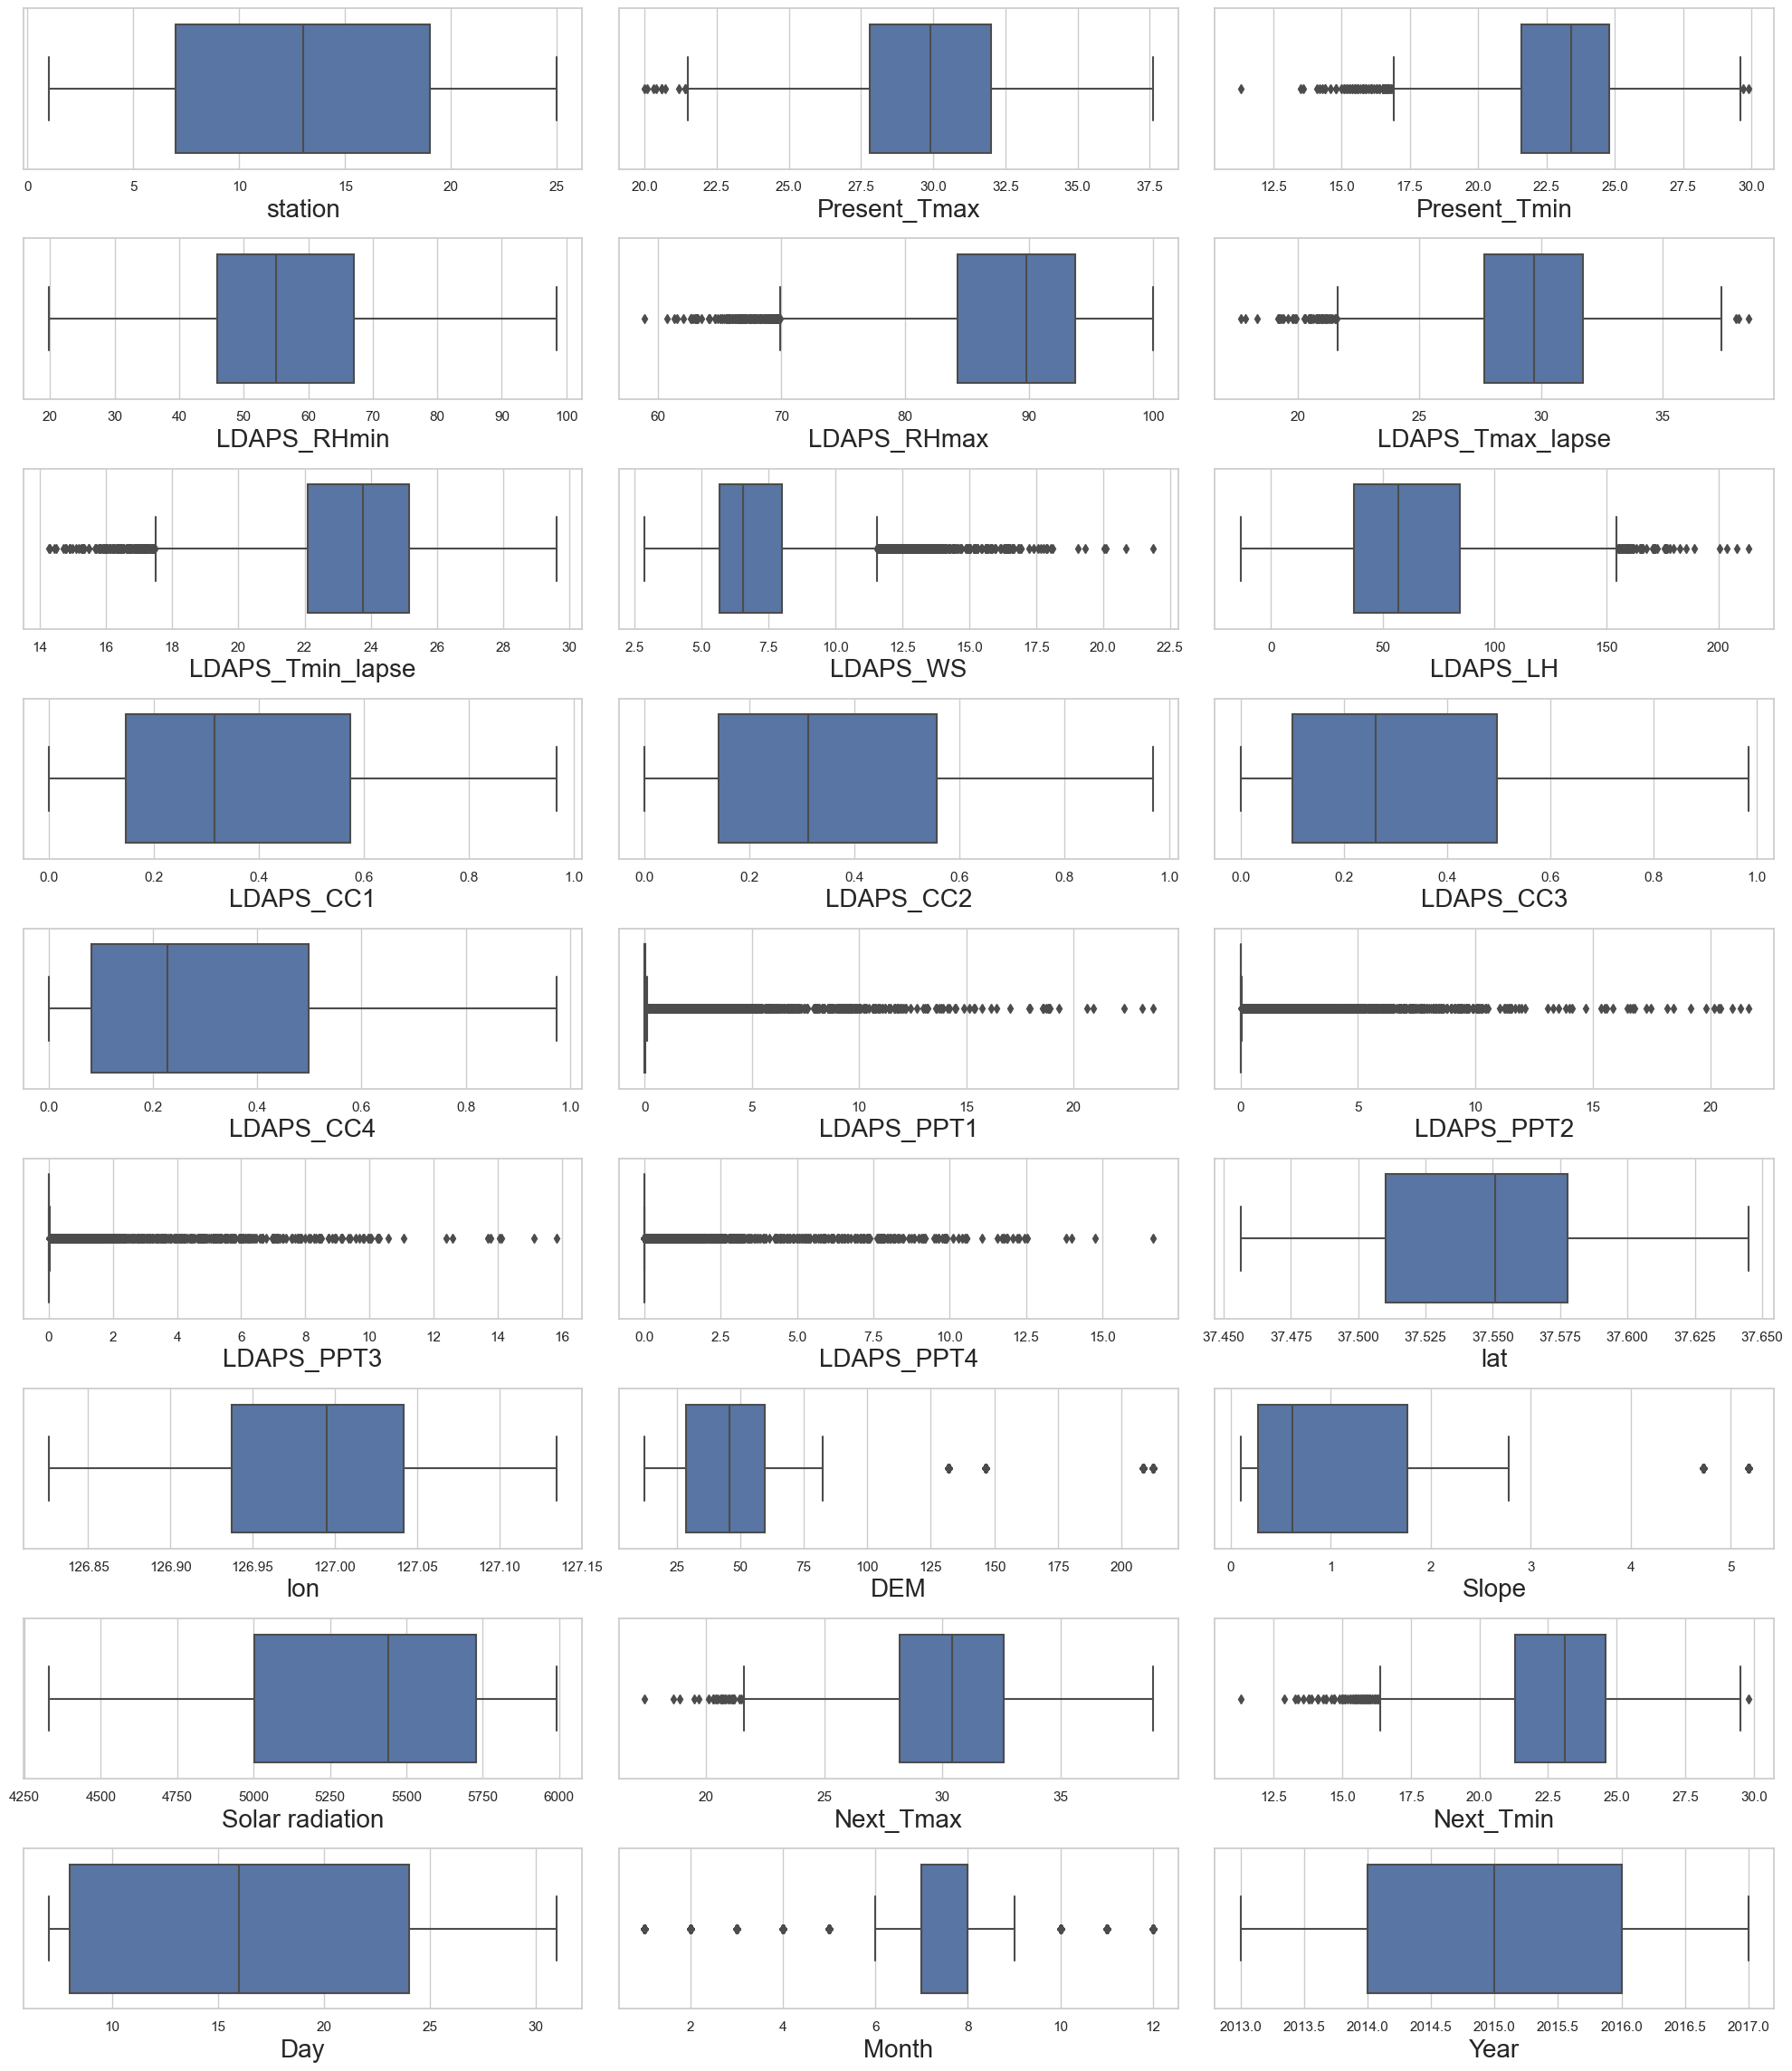

In [44]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=27:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

From the abover observation through boxplot we can see that there are outliners are present in most of the columns.

Outliers removal using Zscore method


In [45]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7588, 27)
Shape of the dataframe after removing outliers:  (6739, 27)
Percentage of data loss post outlier removal:  11.188719030047443


11.18% of the data is being lost. Despite its size, we can afford it. Considering that our dataset for the ML model construction contains a large number of rows.

Skewness of features

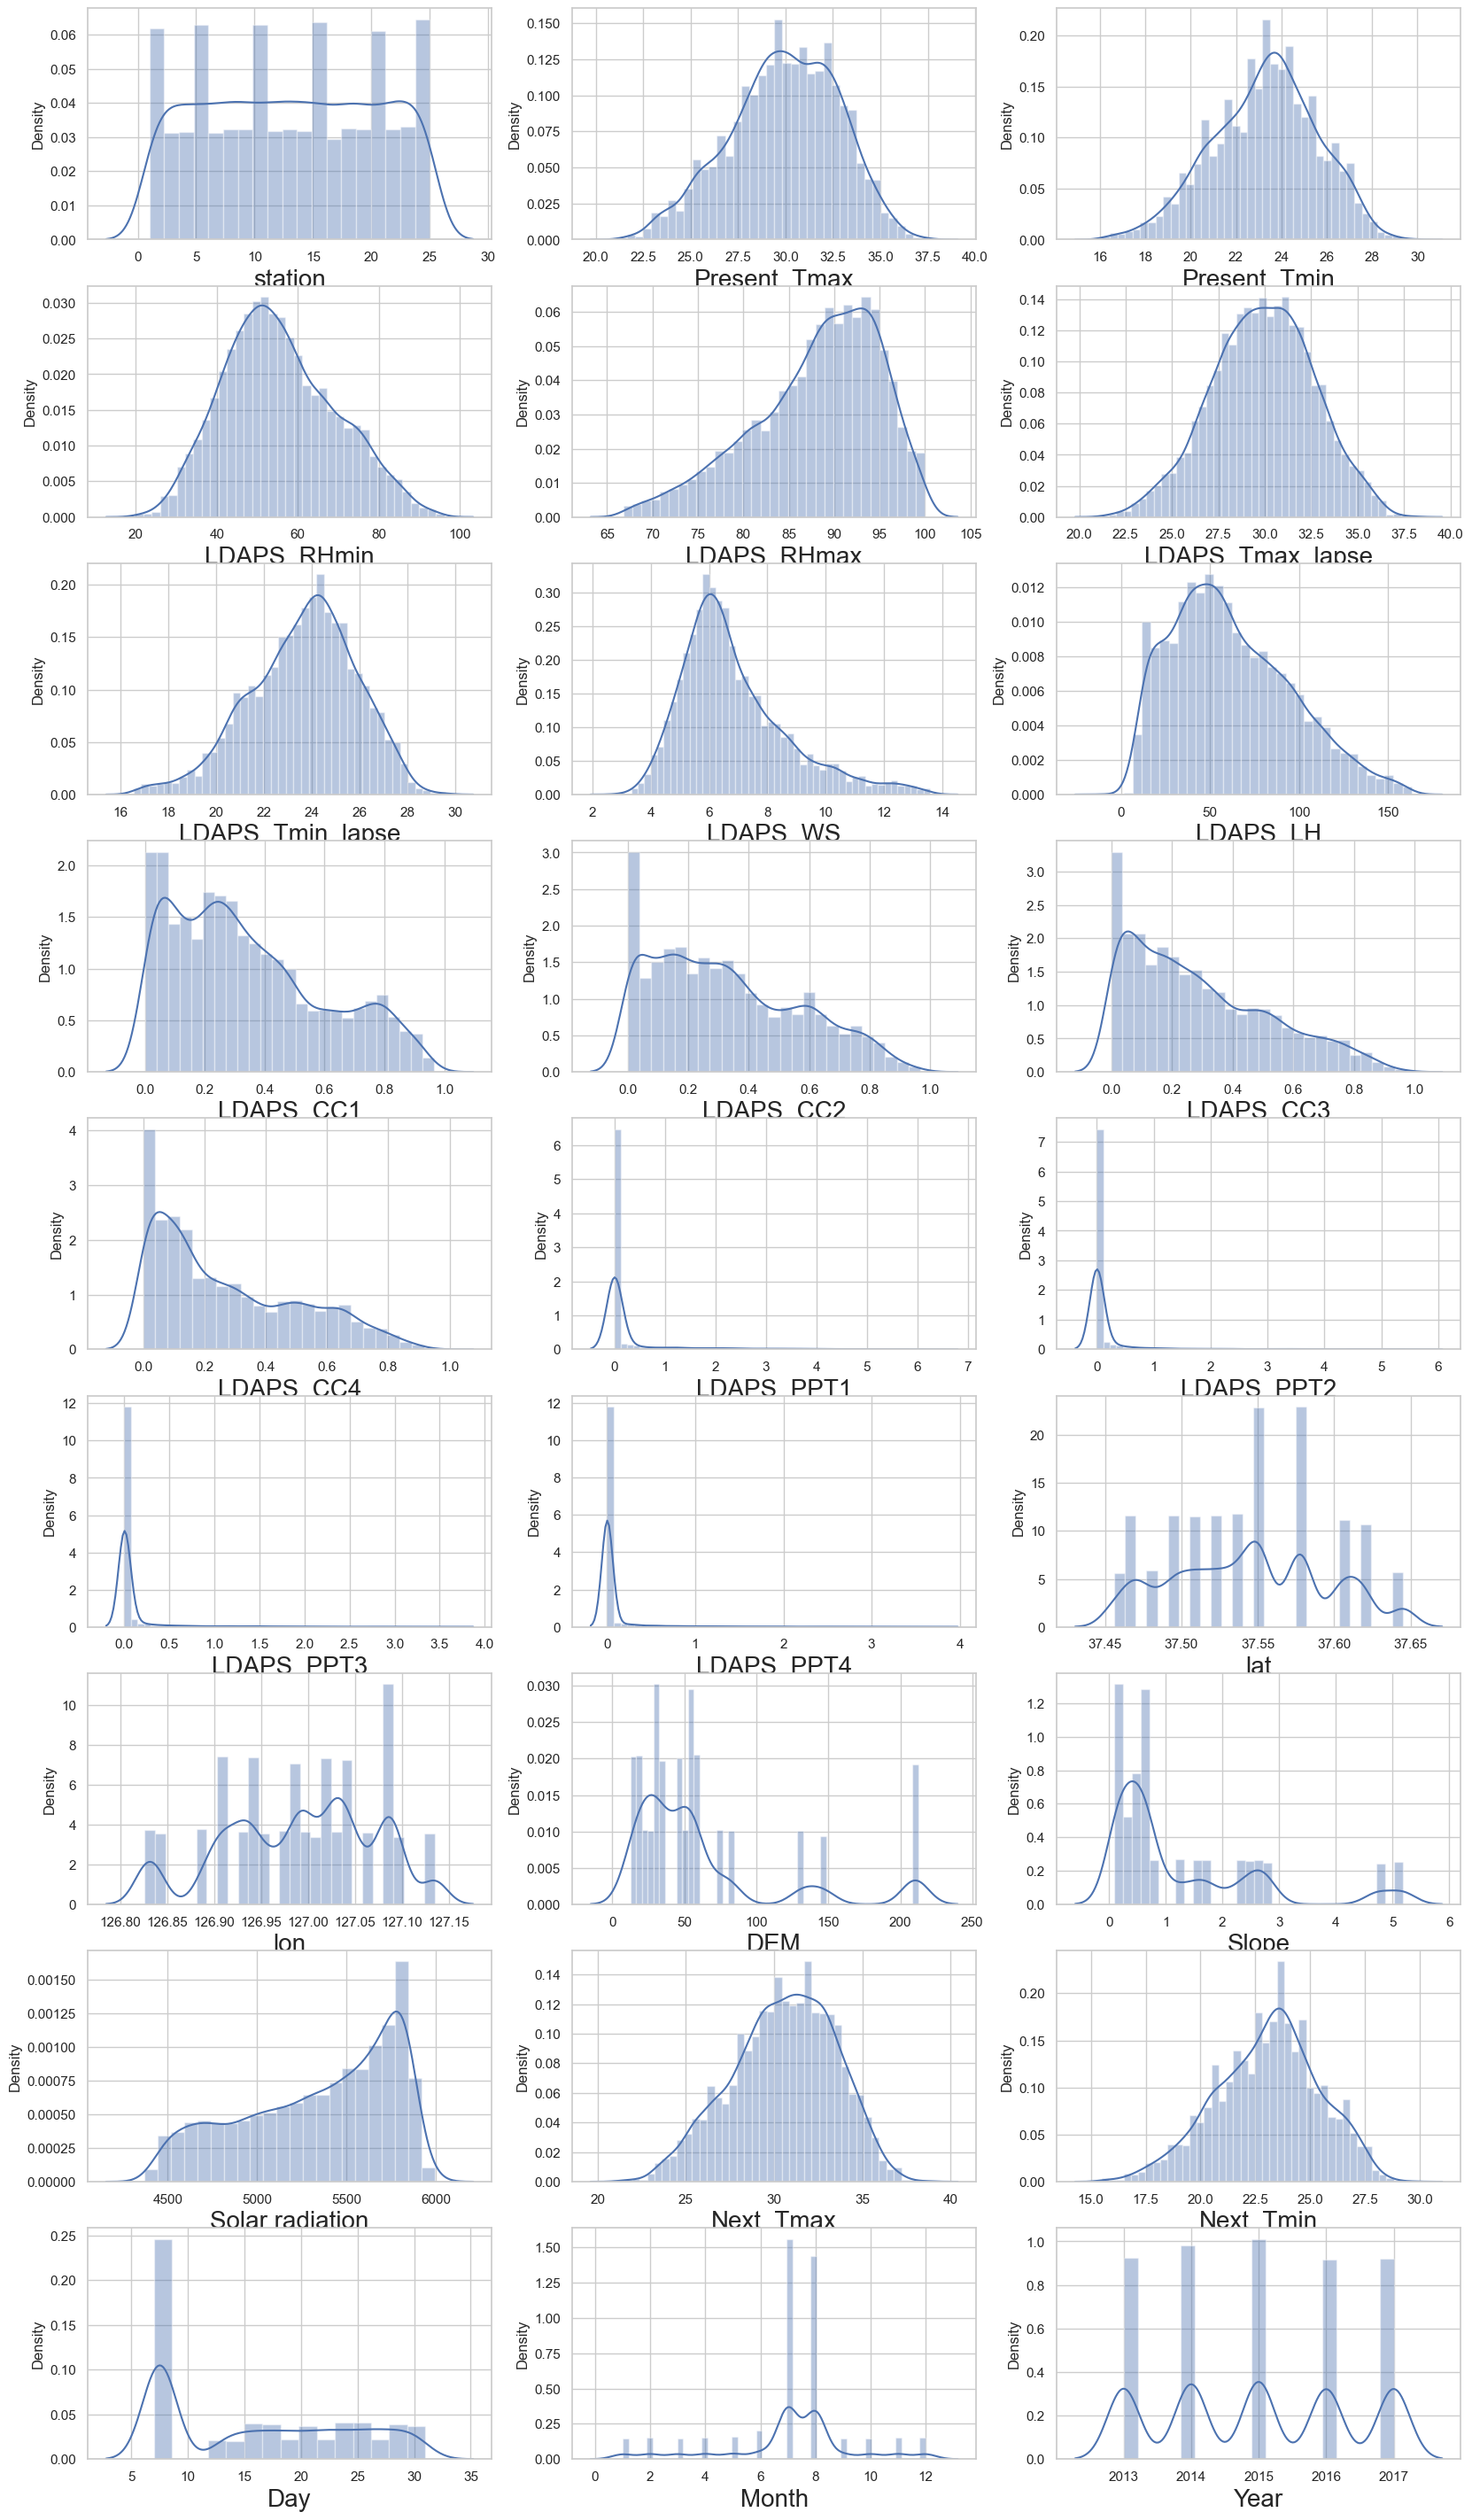

In [46]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [47]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

Here, part of the skewness is positive and some is negative. We will use yeo-johnson method for transfromation.

In [48]:
# List of columns to transform
skew_columns = ['LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC3', 'LDAPS_CC4',
                'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation', 'Month']

# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Creating a PowerTransformer with the yeo-johnson method
scaler = PowerTransformer(method='yeo-johnson')

# Transforming the selected columns
df[skew_columns] = scaler.fit_transform(df[skew_columns].values)


In [50]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.027814
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month               0.039744
Year                0.025066
dtype: float64

For LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 skewness has not been removed but it got reduced

# HeatMap Corrleation

In [51]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005179     -0.136914     -0.076877    -0.070194   
Month             0.003494      0.039443     -0.019387    -0.070498   
Year              0.006658      0.099185      0.099222     0.001709   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.205979   
Next_Tmin           -0.110402          0.553227          0.873678  0.023330   
Day                 -0.009056         -0.140514        

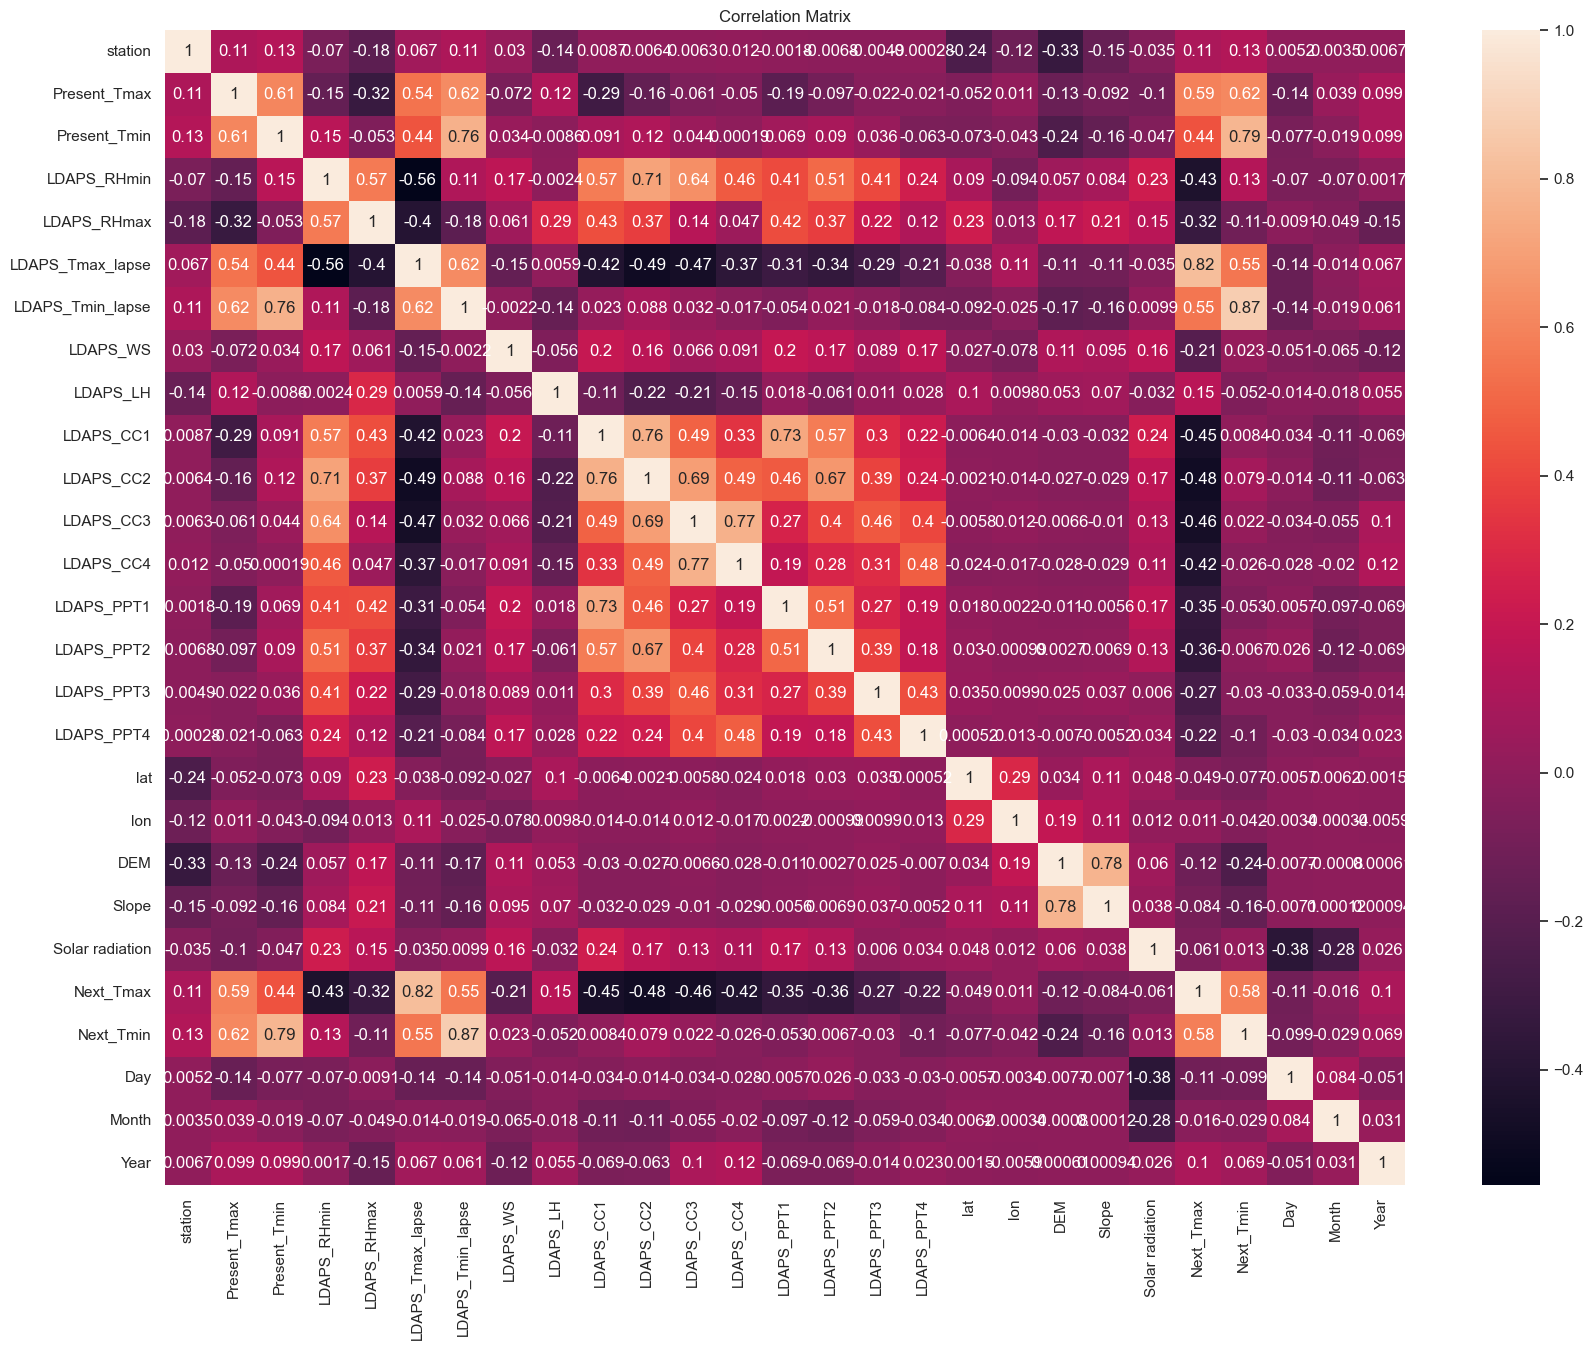

In [52]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

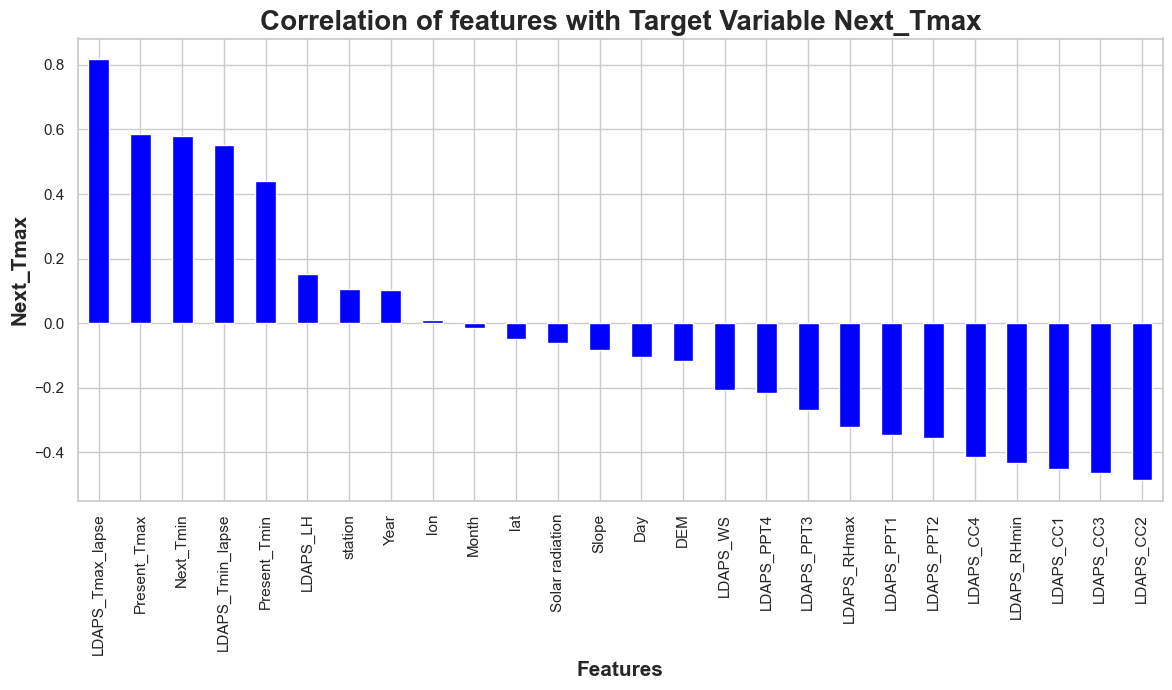

In [53]:
plt.figure(figsize = (14,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'blue')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.

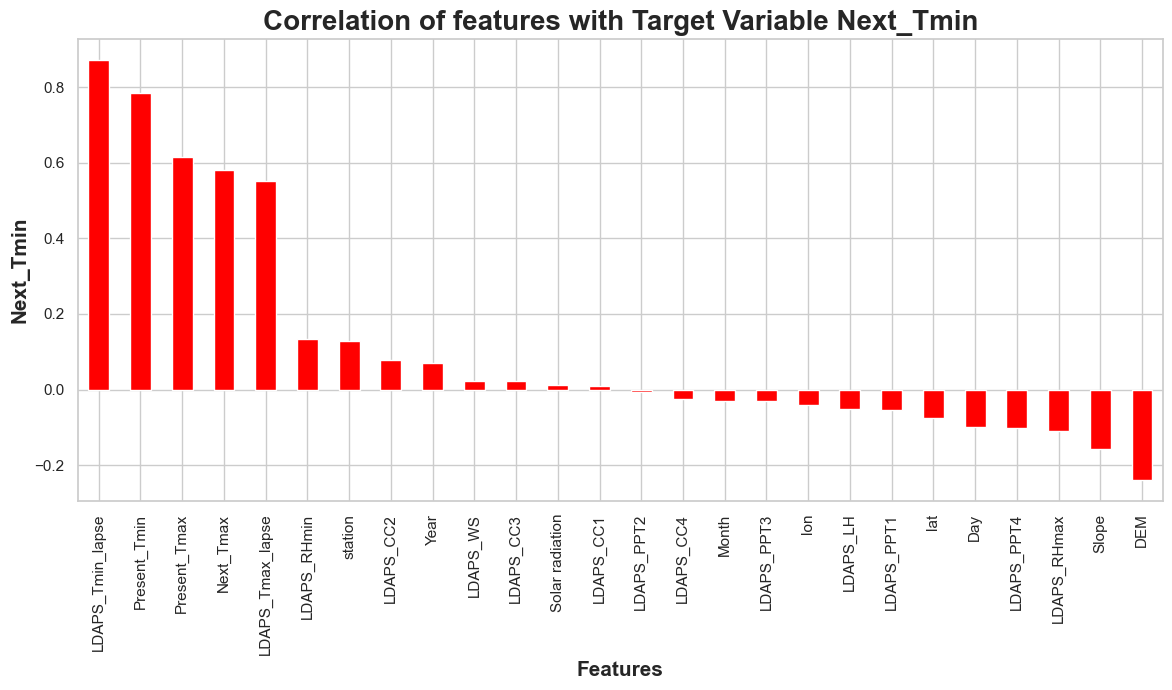

In [54]:
plt.figure(figsize = (14,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'red')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

Temperature related feature are moderately or highly correlated with Target Feature.



# Machine Learning Model Building For Next_Tmax

Standard Scaling


In [55]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [56]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

Checking Multicollinearity between features using variance_inflation_factor

In [57]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.290528           station
1     2.848829      Present_Tmax
2     3.382429      Present_Tmin
3     6.037396       LDAPS_RHmin
4     2.611983       LDAPS_RHmax
5     6.621815  LDAPS_Tmax_lapse
6     8.203124  LDAPS_Tmin_lapse
7     1.223949          LDAPS_WS
8     1.520712          LDAPS_LH
9     4.873088         LDAPS_CC1
10    5.530661         LDAPS_CC2
11    4.567147         LDAPS_CC3
12    2.791604         LDAPS_CC4
13    2.601114        LDAPS_PPT1
14    2.174143        LDAPS_PPT2
15    1.592100        LDAPS_PPT3
16    1.600327        LDAPS_PPT4
17    1.296703               lat
18    1.224341               lon
19    3.378294               DEM
20    2.874180             Slope
21    1.484989   Solar radiation
22    5.651856         Next_Tmin
23    1.259087               Day
24    1.122102             Month
25    1.125621              Year

Independent feature VIF is within permissible limit of 10

# PCA

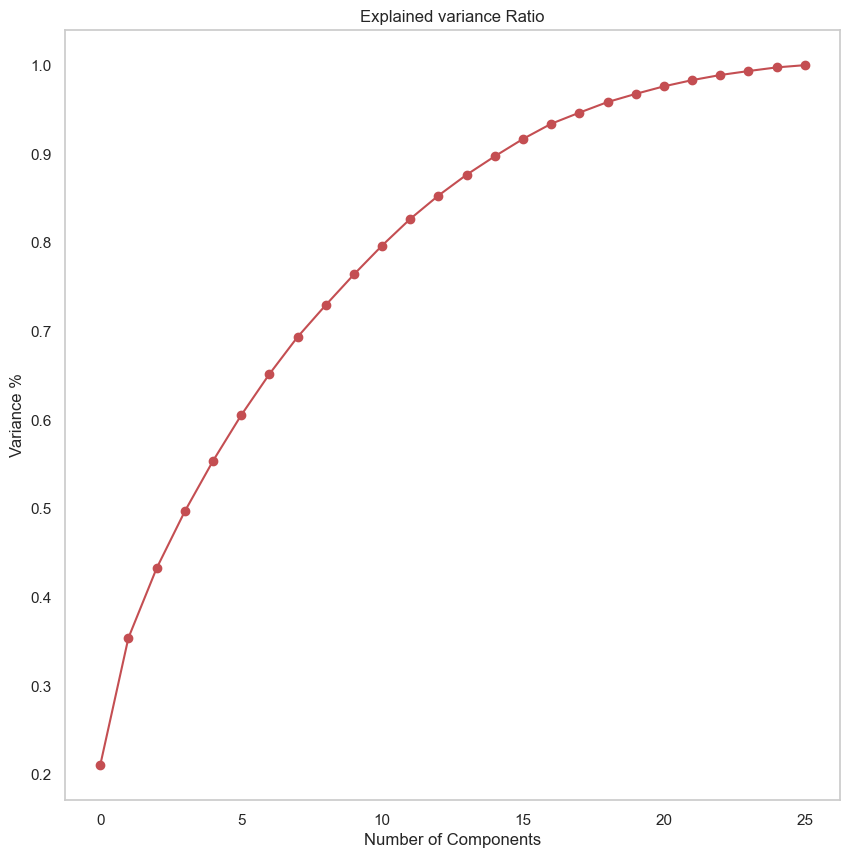

In [58]:

pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

Remark:
    
Based on the graph, we can observe that 90% of the fluctuation in the data can be attributed to 15 primary components. We'll select the top 15 elements for our prediction.

In [59]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [60]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


# Finding best Random state

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.30)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8023393549315812 on Random_state 470


# Linear Regression Base Model

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=470, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [28.85936498 31.61545083 30.67621625 ... 33.55604783 31.28516989
 30.54832892]


Actual Wins:
 2493    26.9
985     33.2
4072    34.2
1596    30.6
7298    29.0
        ... 
5671    34.6
1383    32.2
5626    33.6
2621    31.5
3267    30.2
Name: Next_Tmax, Length: 2224, dtype: float64


In [64]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 1.0183457681476382
Mean squared error : 1.7877708946569273
Root Mean Squared Error: 1.3370755007317003


 R2 Score :
0.799660364740341


In [65]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())


Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6691977299722439


In [66]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.702818794964029
Mean squared error : 0.8750890526079144
Root Mean Squared Error: 0.9354619461035891


 R2 Score :
0.9019365276931455


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6078889388489209
Mean squared error : 0.6383138718525183
Root Mean Squared Error: 0.7989454748933236


 R2 Score :
0.9284698231466318


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0001798561151078
Mean squared error : 1.896735611510791
Root Mean Squared Error: 1.3772202480034887


 R2 Score :
0.7874496549139769


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.1420727500426888
Mean squared error : 2.013679303017586
Root Mean Squared Error: 1.4190416847357183


 R2 Score :
0.7743448121332775


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8411839427539499
Mean squared error : 1.1869118203657592
Root Mean Squared Error: 1.0894548271340851


 R2 Score :
0.8669933144744002


 Error of  XGBRegr

In [67]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('===============================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6828370647053399


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6966855225403557


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.4139074005817922


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6498882417924695


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7049207881053314


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

Among the models  considered, ExtraTreesRegressor has lower errors (MAE, MSE, RMSE) and higher R2 score, indicating better performance on the test set. Additionally, the mean cross-validation score is relatively high, suggesting good generalization performance.

Therefore, based on the provided information, the ExtraTreesRegressor appears to be the best-performing model for  dataset and task.

# Hyper Parameter Tuning : GridSearchCV

In [68]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [69]:
etr = ExtraTreesRegressor()

In [70]:
grid_search = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [73]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [74]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [75]:
print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [76]:

# Create the ExtraTreesRegressor with the best parameters from GridSearchCV or your choice
final_mod_extra_trees = ExtraTreesRegressor(n_estimators=300, max_depth=8, min_samples_split=2, min_samples_leaf=1, bootstrap=False)

# Fit the model
final_mod_extra_trees.fit(X_train, Y_train)

# Predictions
y_pred_extra_trees = final_mod_extra_trees.predict(X_test)

# Print errors
print('\n')
print('\033[1m' + ' Error in Final Extra Trees Model :' + '\033[0m')
print('Mean absolute error:', mean_absolute_error(Y_test, y_pred_extra_trees))
print('Mean squared error:', mean_squared_error(Y_test, y_pred_extra_trees))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred_extra_trees)))
print('\n')
print('\033[1m' + ' R2 Score of Final Extra Trees Model :' + '\033[0m')
print(r2_score(Y_test, y_pred_extra_trees))
print('\n')




 Error in Final Extra Trees Model :
Mean absolute error: 0.8863400757118288
Mean squared error: 1.2953966176801643
Root Mean Squared Error: 1.1381549181373176


 R2 Score of Final Extra Trees Model :
0.8548363849762518




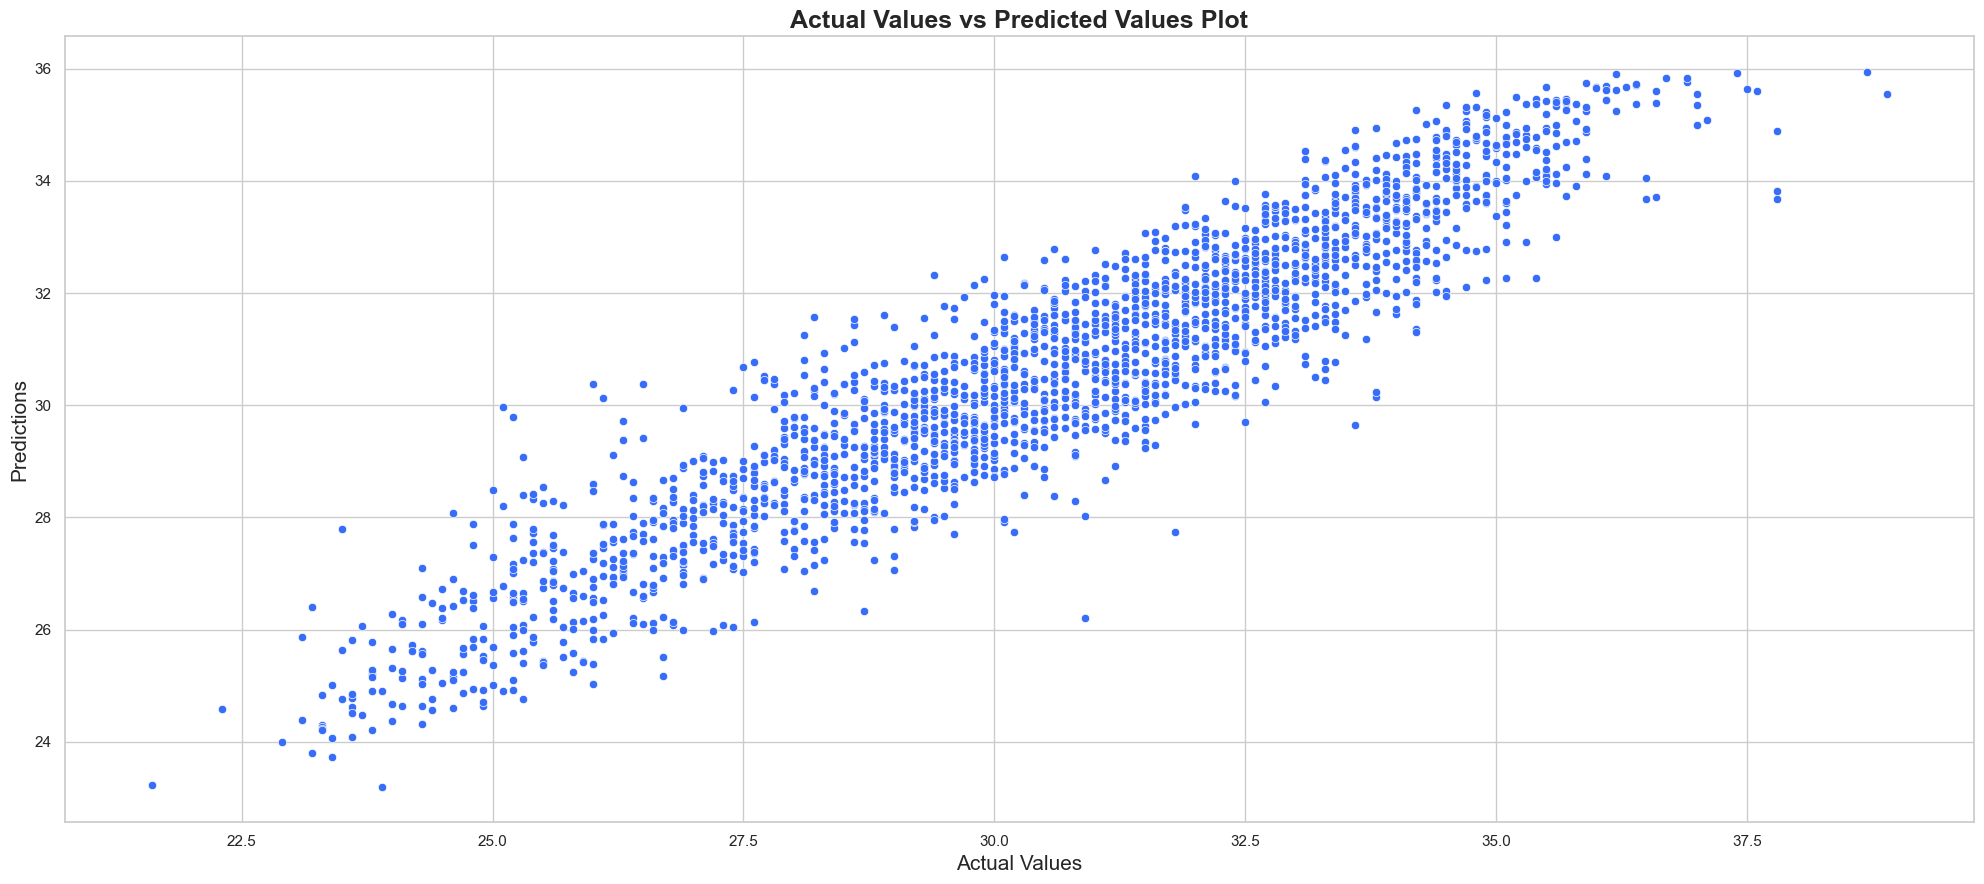

In [78]:
plt.figure(figsize=(20, 9))
y_pred_extra_trees = final_mod_extra_trees.predict(X_test)

# Using scatterplot instead of scatterplot for regression
sns.scatterplot(x=Y_test.round(2), y=y_pred_extra_trees)
plt.title('Actual Values vs Predicted Values Plot', fontsize=18, fontweight='bold')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

plt.show()

# Final Regression Saving Model

In [80]:
import joblib
joblib.dump(final_mod_extra_trees,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

# Prediction According Final Regression Model

In [81]:
# Loading the saved model
Model = joblib.load("Next_Tmax_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              26.9         28.885477
1              33.2         32.219796
2              34.2         31.353445
3              30.6         29.775475
4              29.0         29.879729
...             ...               ...
2219           34.6         34.508048
2220           32.2         31.667818
2221           33.6         33.871464
2222           31.5         31.134205
2223           30.2         29.718852

[2224 rows x 2 columns]

# Machine Learning Model Building For Next_Tmin

# Standard Scaling

In [82]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [83]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 26)
Training target vector size: (4515,)
Test feature matrix size: (2224, 26)
Test target vector size: (2224,)


# Finding best Random state

In [85]:
axR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8506252552203425 on Random_state 43


In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [23.46238346 24.67671768 23.16276446 ... 22.52790743 26.49278455
 25.3726423 ]


Actual Wins:
 5006    23.0
947     25.6
3726    23.0
715     22.1
4242    24.0
        ... 
4097    24.6
3186    17.1
6641    23.1
3854    26.2
1190    25.7
Name: Next_Tmin, Length: 2224, dtype: float64


# Linear Regression Evaluation Matrix

In [87]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.7376270230353691
Mean squared error : 0.8611627720034197
Root Mean Squared Error: 0.9279885624313587


 R2 Score :
0.8506252552203426


In [88]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7876378063969723


# Applying other ML Models

In [89]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('========================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.555585431654676
Mean squared error : 0.5284238723021578
Root Mean Squared Error: 0.7269276939986244


 R2 Score :
0.9083411596195896


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5133534172661871
Mean squared error : 0.4574514010791367
Root Mean Squared Error: 0.6763515366132739


 R2 Score :
0.9206518343491265


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.82068345323741
Mean squared error : 1.2376708633093525
Root Mean Squared Error: 1.1125065677600976


 R2 Score :
0.7853172764331726


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8354095308129789
Mean squared error : 1.066437953434824
Root Mean Squared Error: 1.0326848277353666


 R2 Score :
0.8150188300092533


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.601929173015258
Mean squared error : 0.5902042777361685
Root Mean Squared Error: 0.7682475367589332


 R2 Score :
0.8976249134067861


 Error of  XGBRegres

In [90]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==========================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7921618789343636


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7940774607535066


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6040178065884529


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7456901802135938


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8028871137039204


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

valuation metrics and cross-validation scores, the XGBRegressor appears to be the best-performing model among the options you've evaluated. It has the highest R2 Score (0.931) and a competitive Mean CV Score (0.785).

# Hyper Parameter Tuning : GridSearchCV

In [92]:
param_grid = {
    'n_estimators': [50, 75, 100],
    'gamma': np.arange(0, 0.2, 0.1),
    'booster': ['gbtree', 'dart', 'gblinear'],
    'max_depth': [4, 6, 8, 10],
    'eta': [0.001, 0.01, 0.1]
    
}

In [95]:
xgb_model = XGBRegressor()

In [96]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [97]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
            

In [99]:
print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'booster': 'gbtree', 'eta': 0.1, 'gamma': 0.0, 'max_depth': 6, 'n_estimators': 100}


In [101]:
# Final_mod =  XGBRegressor(n_estimators=100 , booster= 'gbtree', eta= 0.1, max_depth= 6, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.47516693091221
Mean squared error : 0.384764671587908
Root Mean Squared Error: 0.6202940202741826


 R2 Score of Final Model :
0.9332598592424473




# Saving Final Regression Model For Next_Tmin

In [102]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

# Prediction According Final Regression Model For Next_Tmin

In [103]:
# Loading the saved model
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted 

Actual Values  Predicted Values
0              23.0         24.091677
1              25.6         25.416008
2              23.0         23.230474
3              22.1         22.839161
4              24.0         23.829100
...             ...               ...
2219           24.6         24.010014
2220           17.1         17.170013
2221           23.1         23.111105
2222           26.2         26.041195
2223           25.7         24.886389

[2224 rows x 2 columns]